**Documentation link [LINK](https://arun-raghav-s.github.io/PRML_minor_project/)**

#**1. Downloading and visualizing the data**

In [ ]:
import pandas as pd
data = pd.read_csv('/content/Country-data.csv')   #downloading the dataset
data

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

**exports, health, imports are given as %age of the GDP per capita**

In [ ]:
data[['exports','health','imports']] = data[['exports','health','imports']].apply(lambda x : x*data["gdpp"]/100)    #multiplying by %age GDP

In [ ]:
data.isna().sum()    #checking for missing values

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

**the data has no missing values**

In [ ]:
len(data['country'].unique()) == len(data)       #checking for repeatation in 'country'

True

In [ ]:
data.shape

(167, 10)

In [ ]:
data.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

**only one column has categorical data; 'country'**

In [ ]:
data.describe()

child_mort        exports       health        imports         income  \
count  167.000000     167.000000   167.000000     167.000000     167.000000   
mean    38.270060    7420.618847  1056.733204    6588.352108   17144.688623   
std     40.328931   17973.885795  1801.408906   14710.810418   19278.067698   
min      2.600000       1.076920    12.821200       0.651092     609.000000   
25%      8.250000     447.140000    78.535500     640.215000    3355.000000   
50%     19.300000    1777.440000   321.886000    2045.580000    9960.000000   
75%     62.100000    7278.000000   976.940000    7719.600000   22800.000000   
max    208.000000  183750.000000  8663.600000  149100.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [ ]:
df = data.drop('country', axis=1)
columns = df.columns
columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

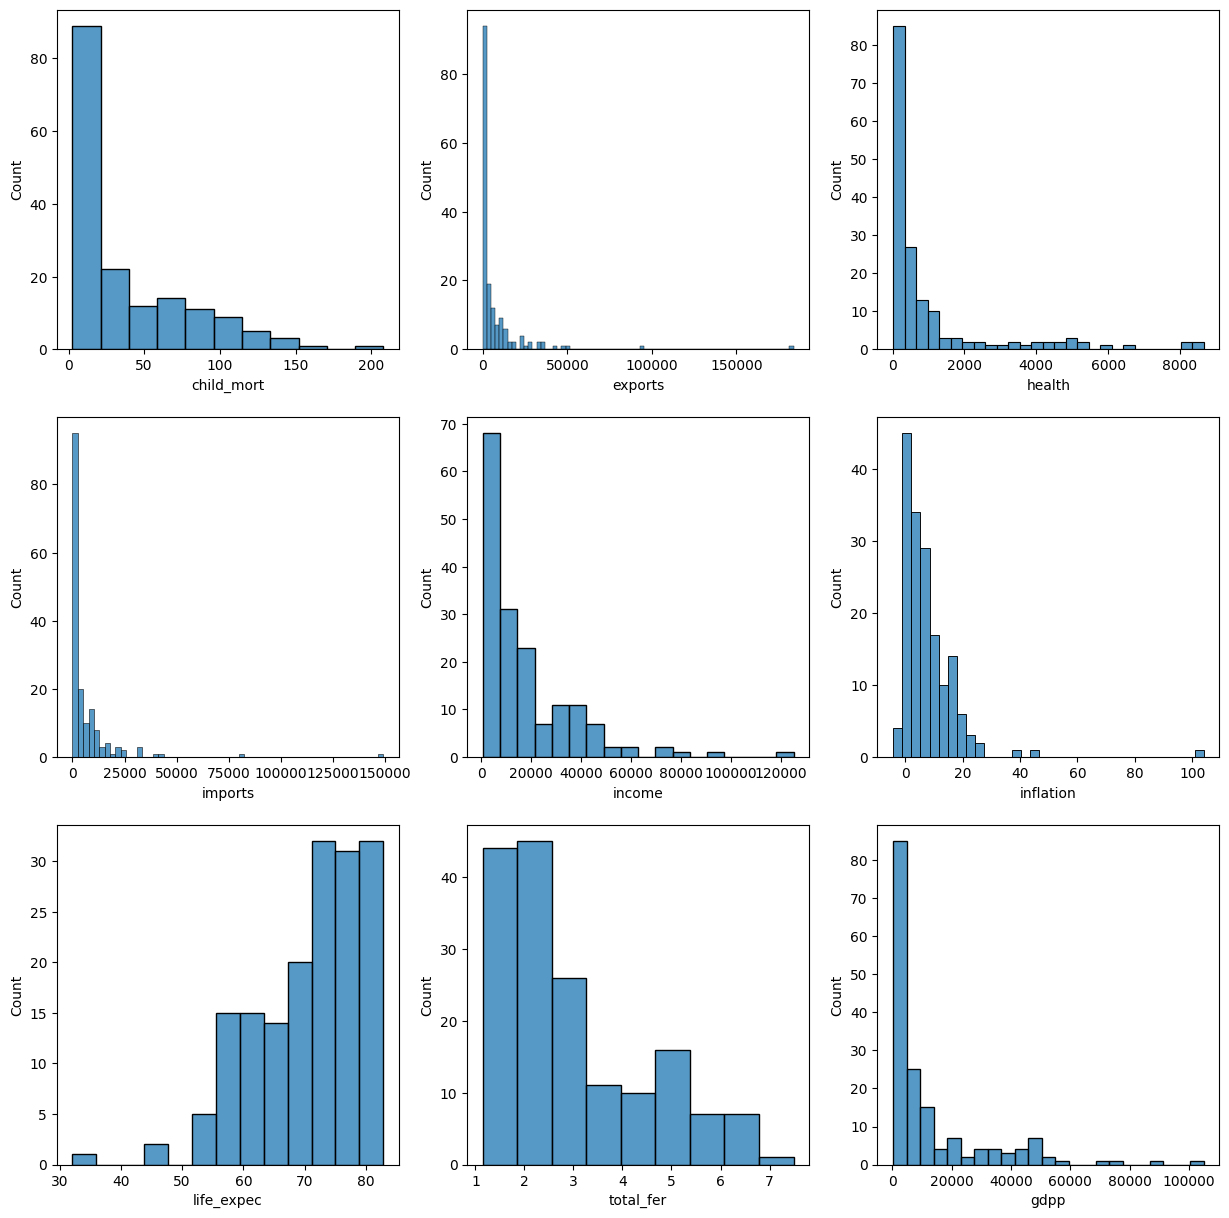

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
for i in range(9):
  plt.subplot(3,3,i+1)         #i+1 because we want to start with 1 (3, 3, 1)
  sns.histplot(df[columns[i]])    #plotting histograms
plt.show()

**'health' is normally distributed, 'life_expec' has left skewed distribution and all others have right skewed distribution**

**also, the data has some outliners**

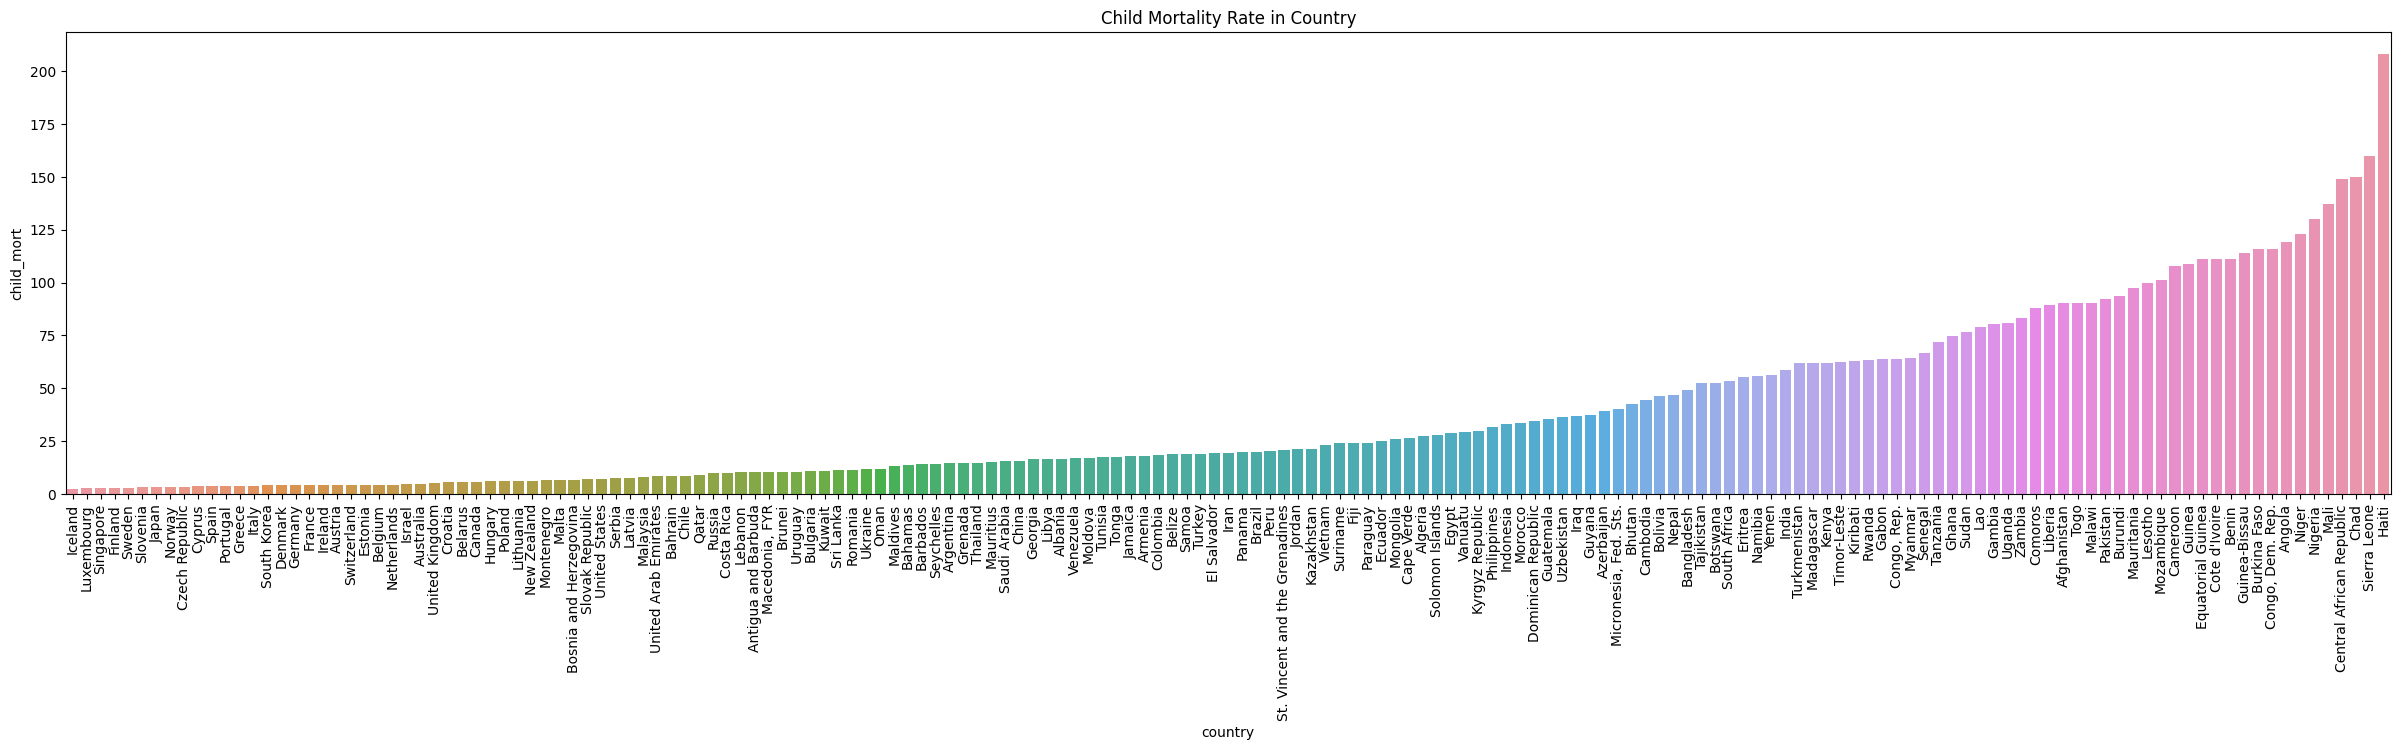

In [ ]:
plt.figure(figsize=(30,6))
child_mort = data[['country', 'child_mort']].sort_values('child_mort', ascending=True)   #creating bar plot for child_mort for each country (in ascending order)
ax = sns.barplot(x='country', y='child_mort', data=child_mort)
ax.set_title('Child Mortality Rate in Country')
plt.xticks(rotation = 90)
plt.show()

**Countries with the lowest Child Mort are in the range of 2-4, while the countries with the highest Child Mort are in the range of 100-200**

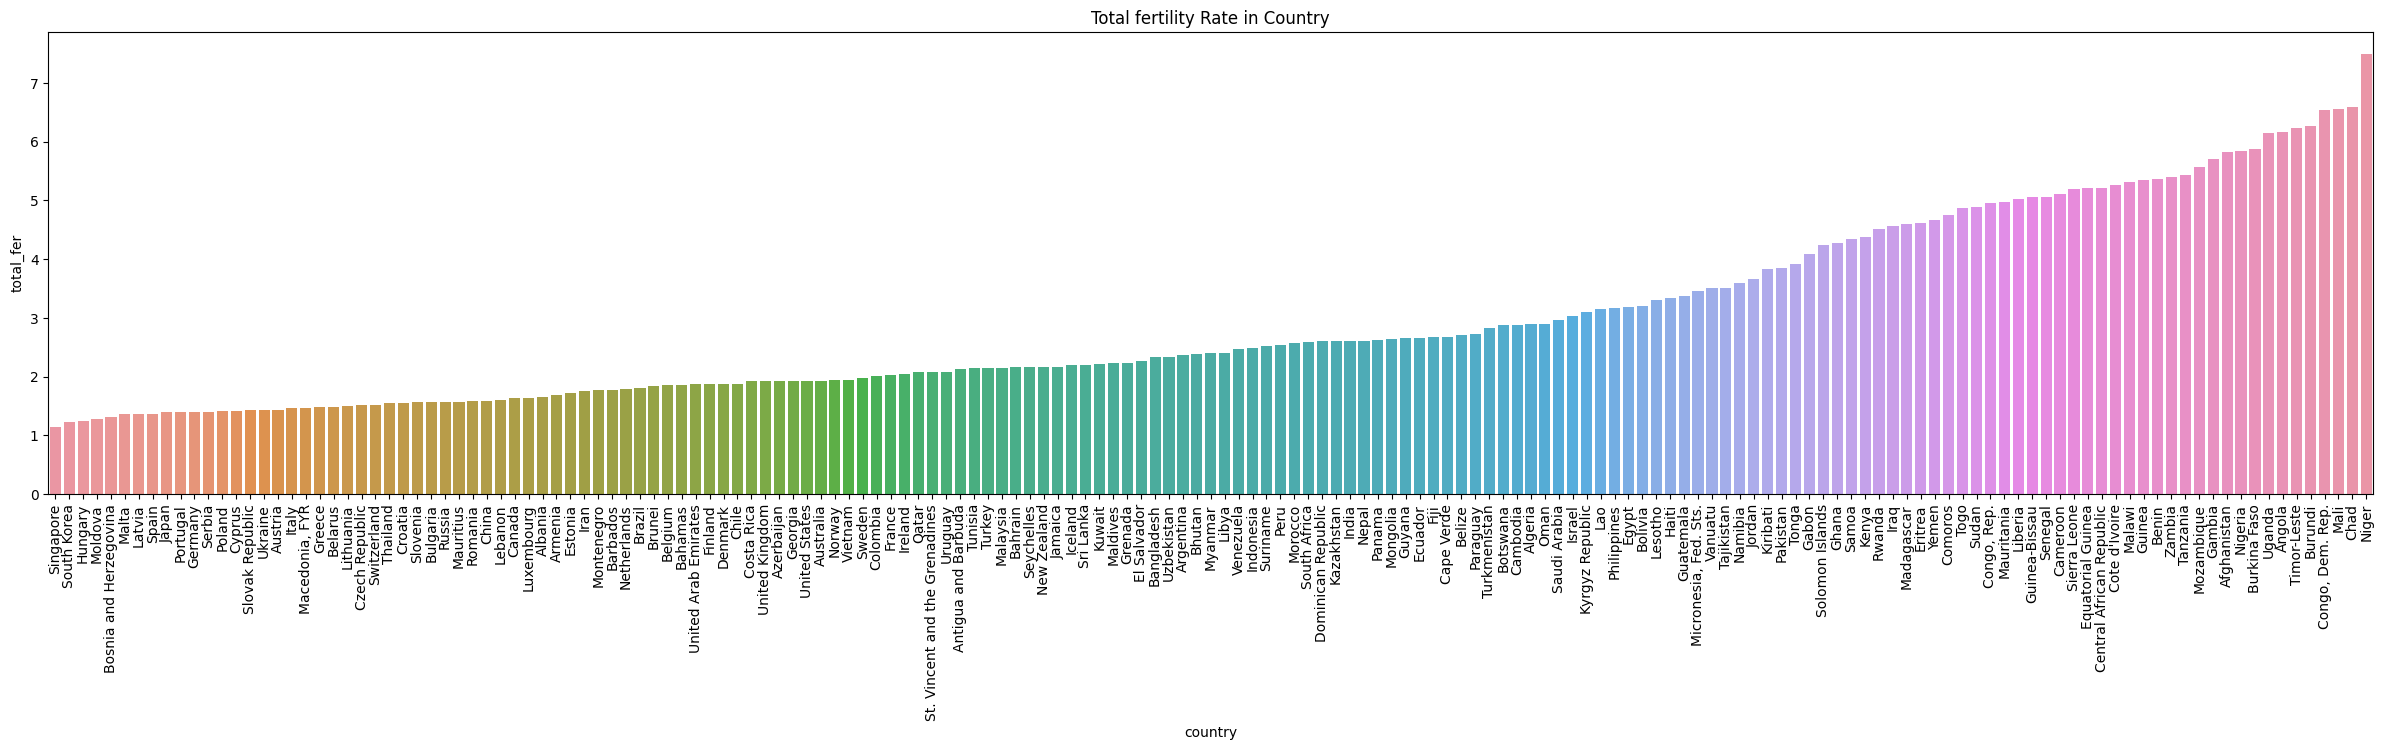

In [ ]:
plt.figure(figsize=(30,6))
child_mort = data[['country', 'total_fer']].sort_values('total_fer', ascending=True)      #creating bar plot for total_fer for each country (in ascending order)
ax = sns.barplot(x='country', y='total_fer', data=child_mort)
ax.set_title('Total fertility Rate in Country')
plt.xticks(rotation = 90)
plt.show()

**Countries with the lowest Total_Fer are in the range of 1-1.5, while the countries with the highest Total_Fer are in the range of 5-7.**

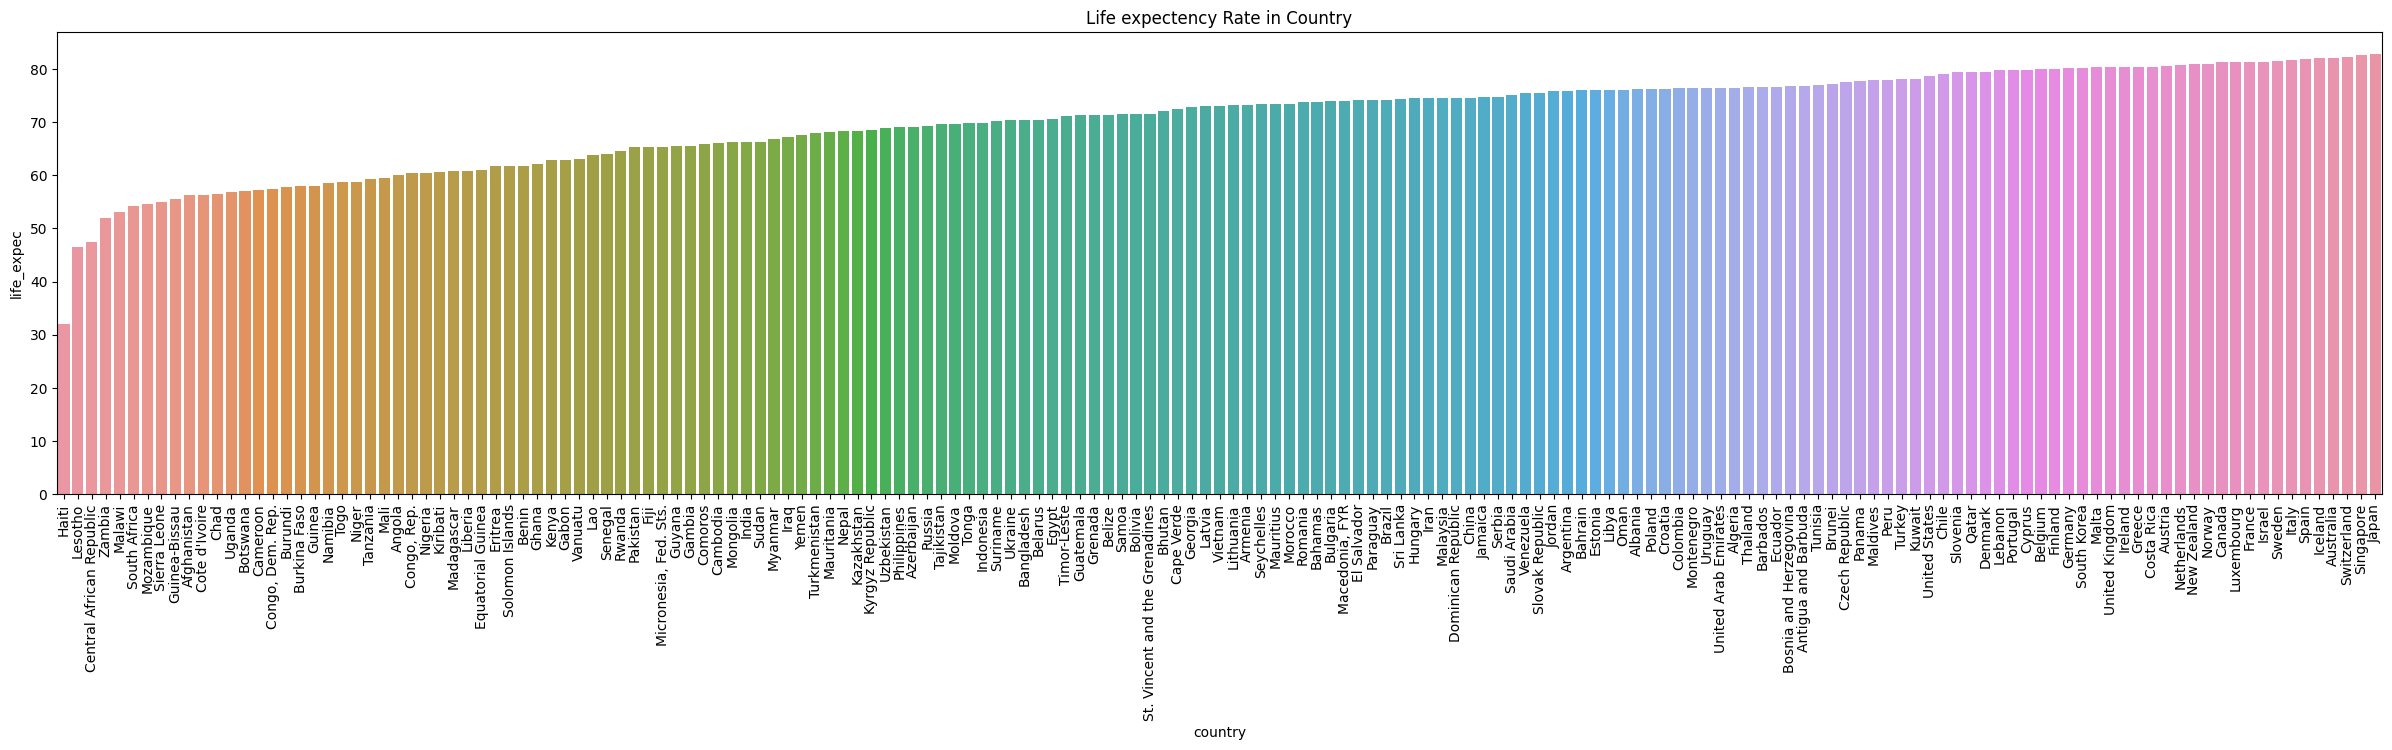

In [ ]:
plt.figure(figsize=(30,6))
child_mort = data[['country', 'life_expec']].sort_values('life_expec', ascending=True)      #creating bar plot for life_expec for each country (in ascending order)
ax = sns.barplot(x='country', y='life_expec', data=child_mort)
ax.set_title('Life expectency Rate in Country')
plt.xticks(rotation = 90)
plt.show()

**Countries with the lowest Life_Expec are in the range of 30-60 years, while the countries with the highest Life_Expec are above 80 years.**

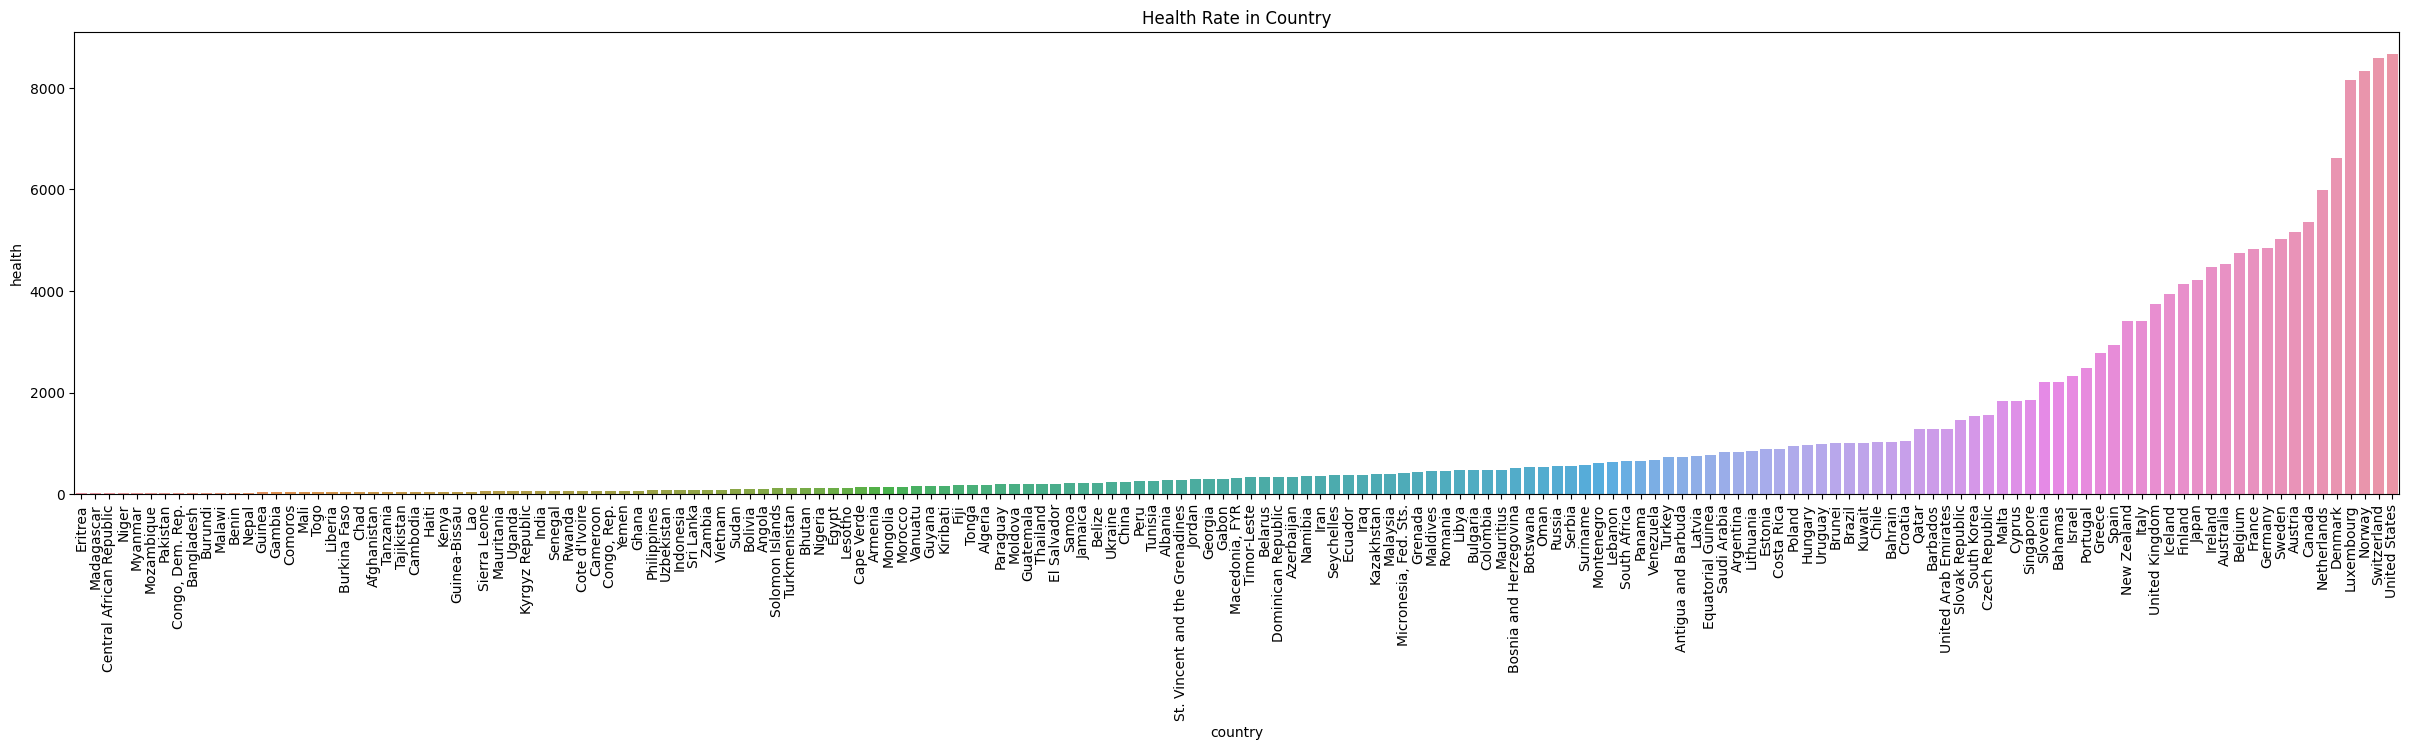

In [ ]:
plt.figure(figsize=(30,6))
child_mort = data[['country', 'health']].sort_values('health', ascending=True)      #creating bar plot for health for each country (in ascending order)
ax = sns.barplot(x='country', y='health', data=child_mort)
ax.set_title('Health Rate in Country')
plt.xticks(rotation = 90)
plt.show()

**Countries with the lowest Health budget are in the range of 15-40 US dollars, while the countries with the highest Health budget are in the range of 4000-8000 US dollars.**

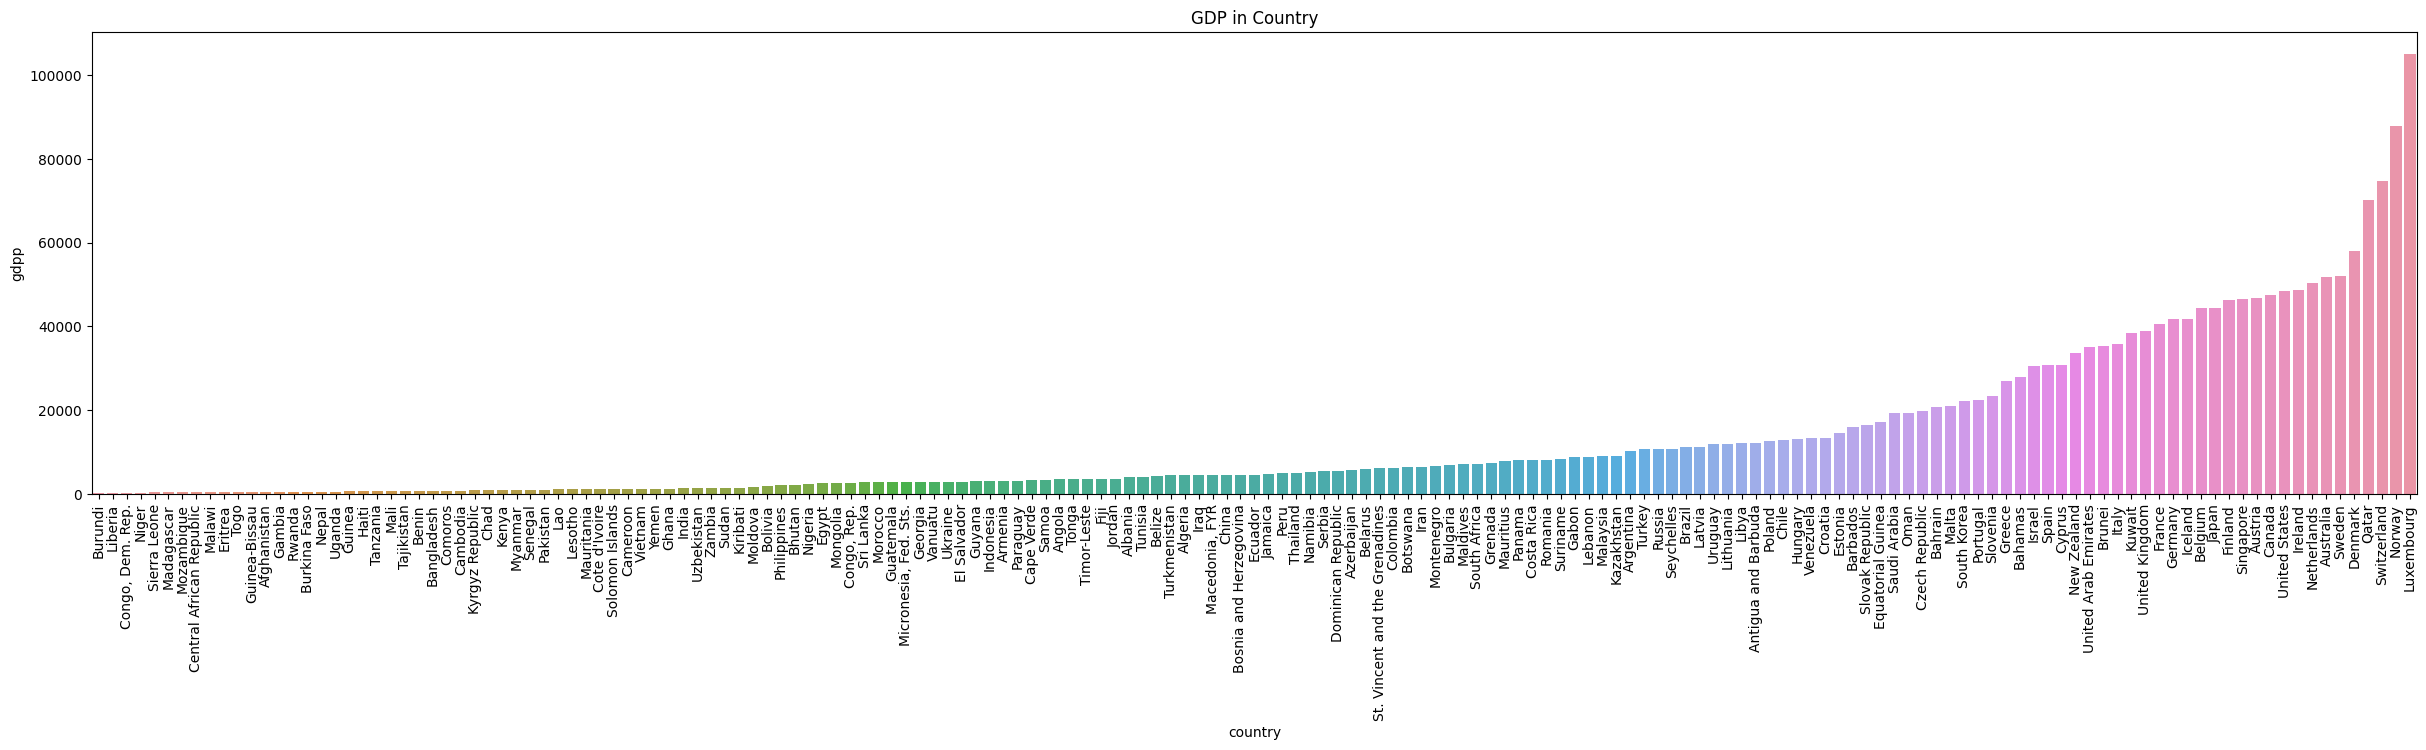

In [ ]:
plt.figure(figsize=(30,6))
child_mort = data[['country', 'gdpp']].sort_values('gdpp', ascending=True)      #creating bar plot for gdpp for each country (in ascending order)
ax = sns.barplot(x='country', y='gdpp', data=child_mort)
ax.set_title('GDP in Country')
plt.xticks(rotation = 90)
plt.show()

**Countries with the lowest GDP are in the range of 200-650 US dollars, while the countries with the highest GDP are in the range of 40000-110000 US dollars.**

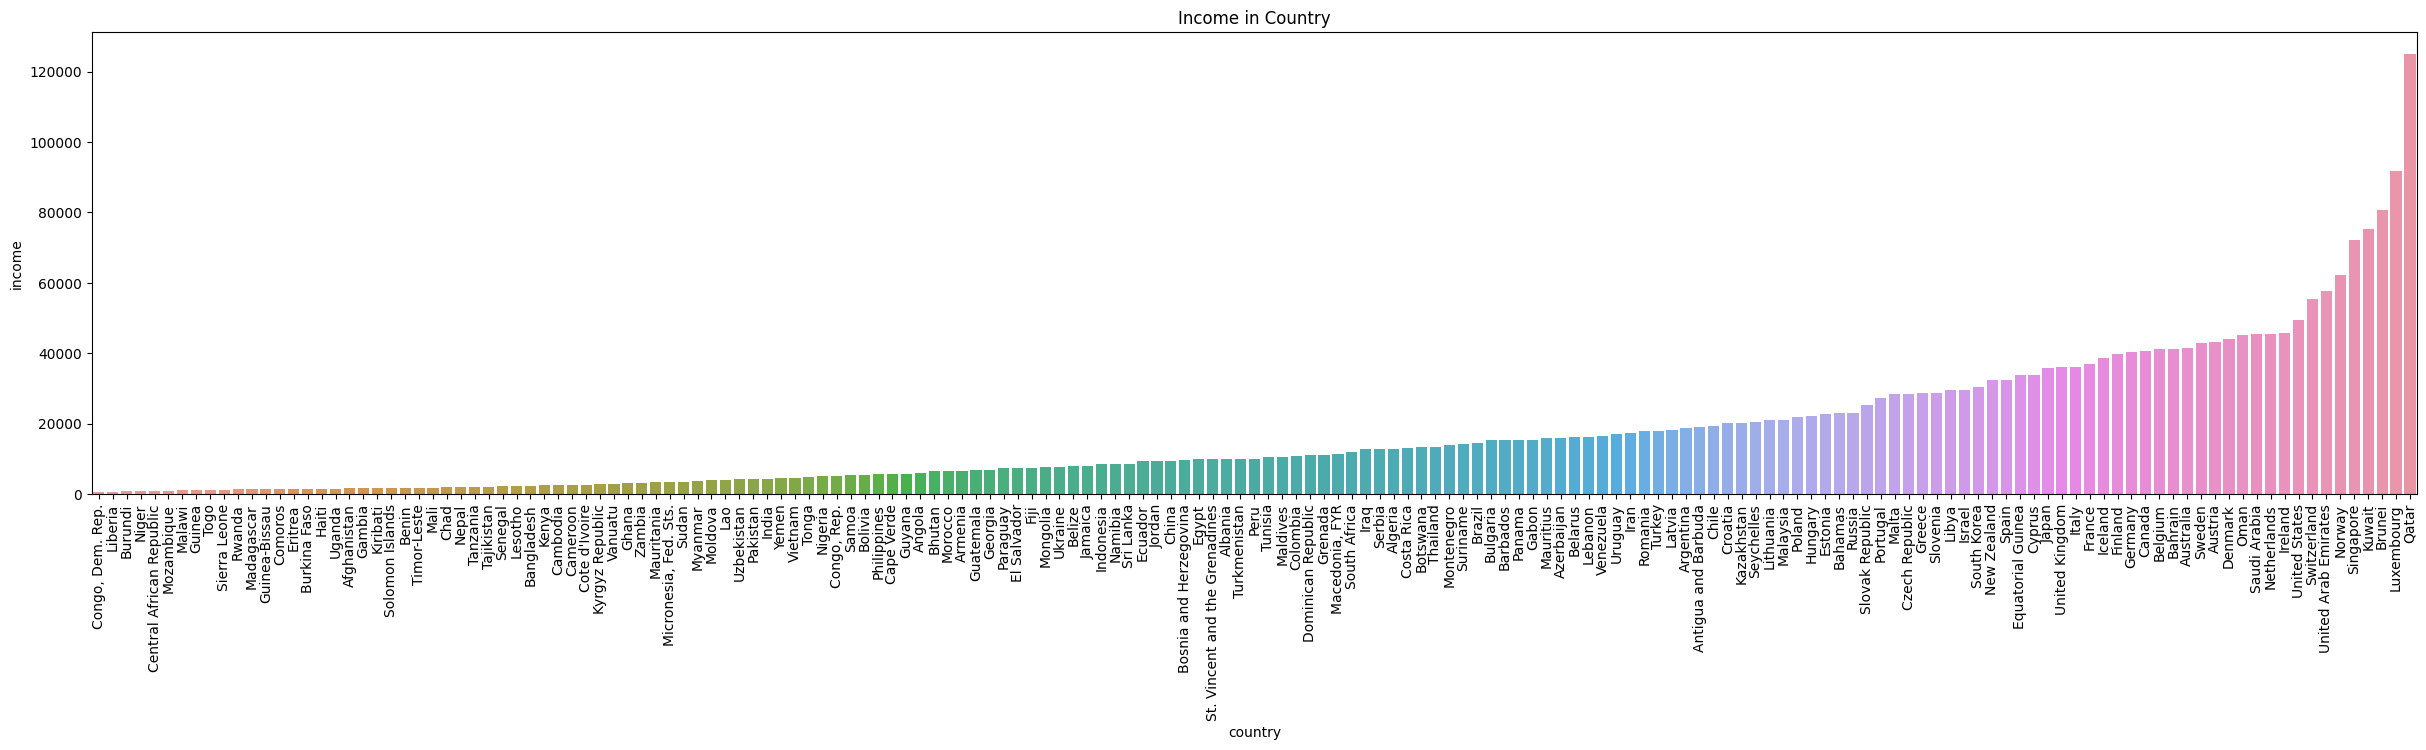

In [ ]:
plt.figure(figsize=(30,6))
child_mort = data[['country', 'income']].sort_values('income', ascending=True)      #creating bar plot for income for each country (in ascending order)
ax = sns.barplot(x='country', y='income', data=child_mort)
ax.set_title('Income in Country')
plt.xticks(rotation = 90)
plt.show()

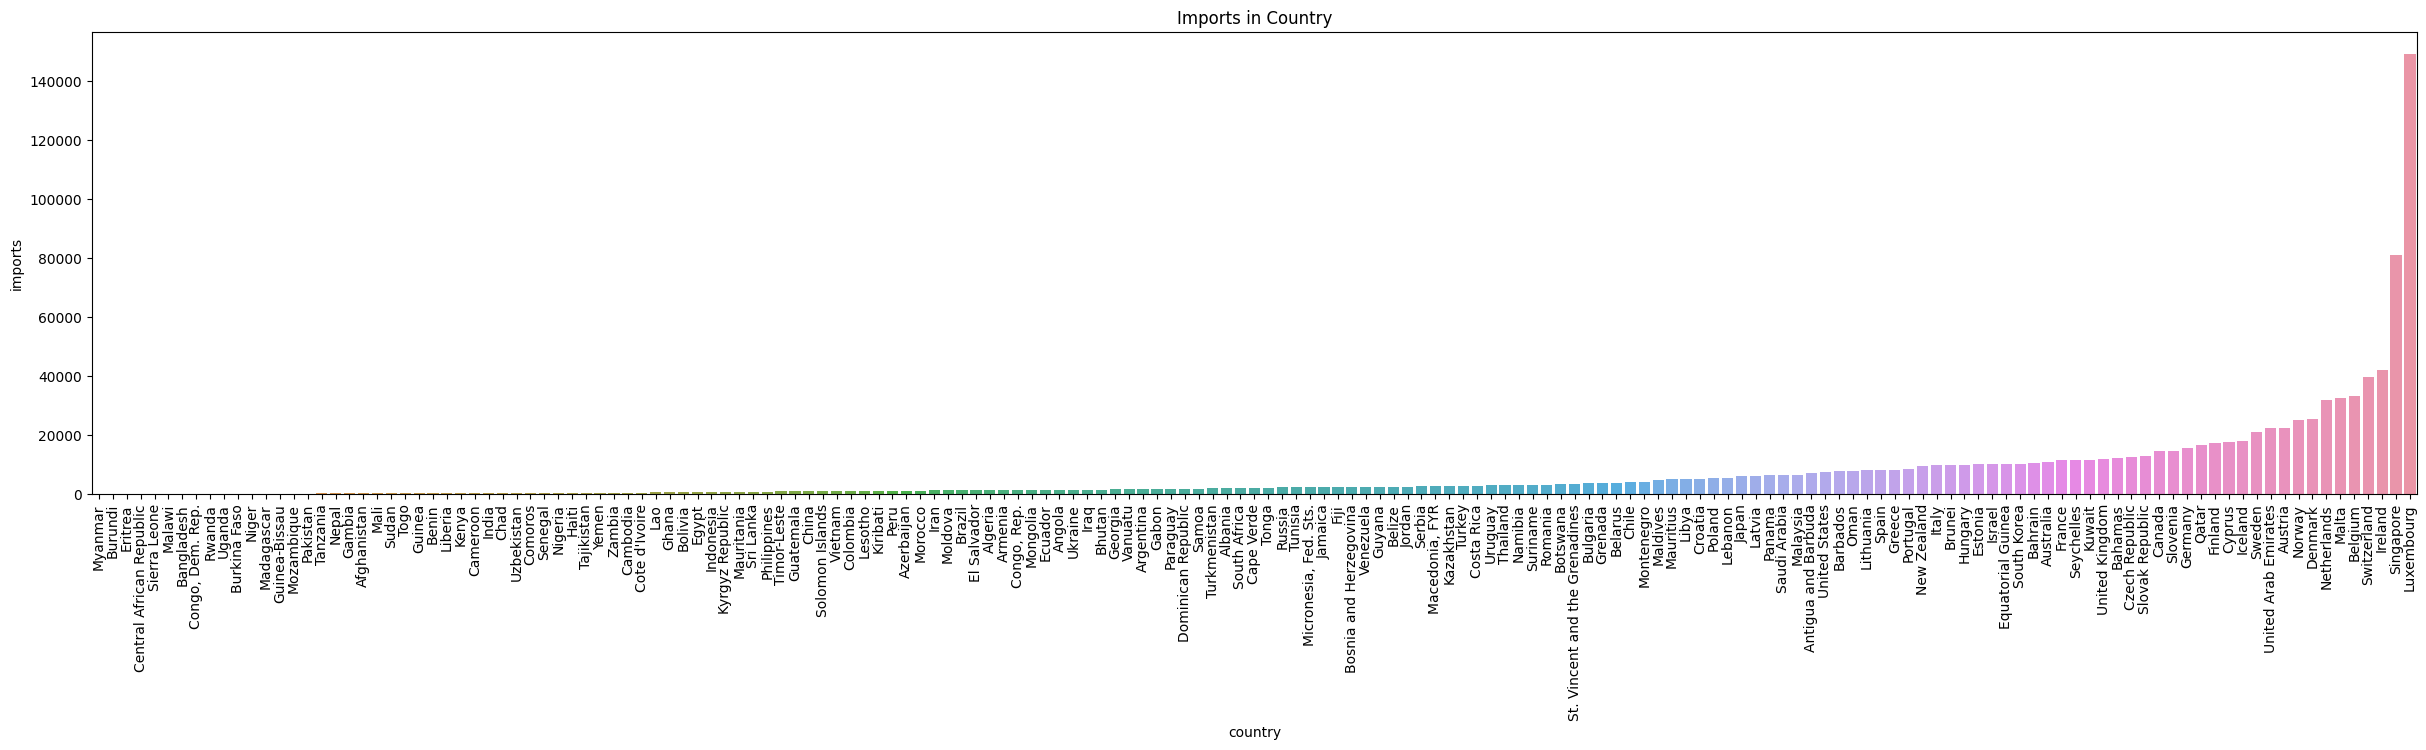

In [ ]:
plt.figure(figsize=(30,6))
child_mort = data[['country', 'imports']].sort_values('imports', ascending=True)      #creating bar plot for imports for each country (in ascending order)
ax = sns.barplot(x='country', y='imports', data=child_mort)
ax.set_title('Imports in Country')
plt.xticks(rotation = 90)
plt.show()

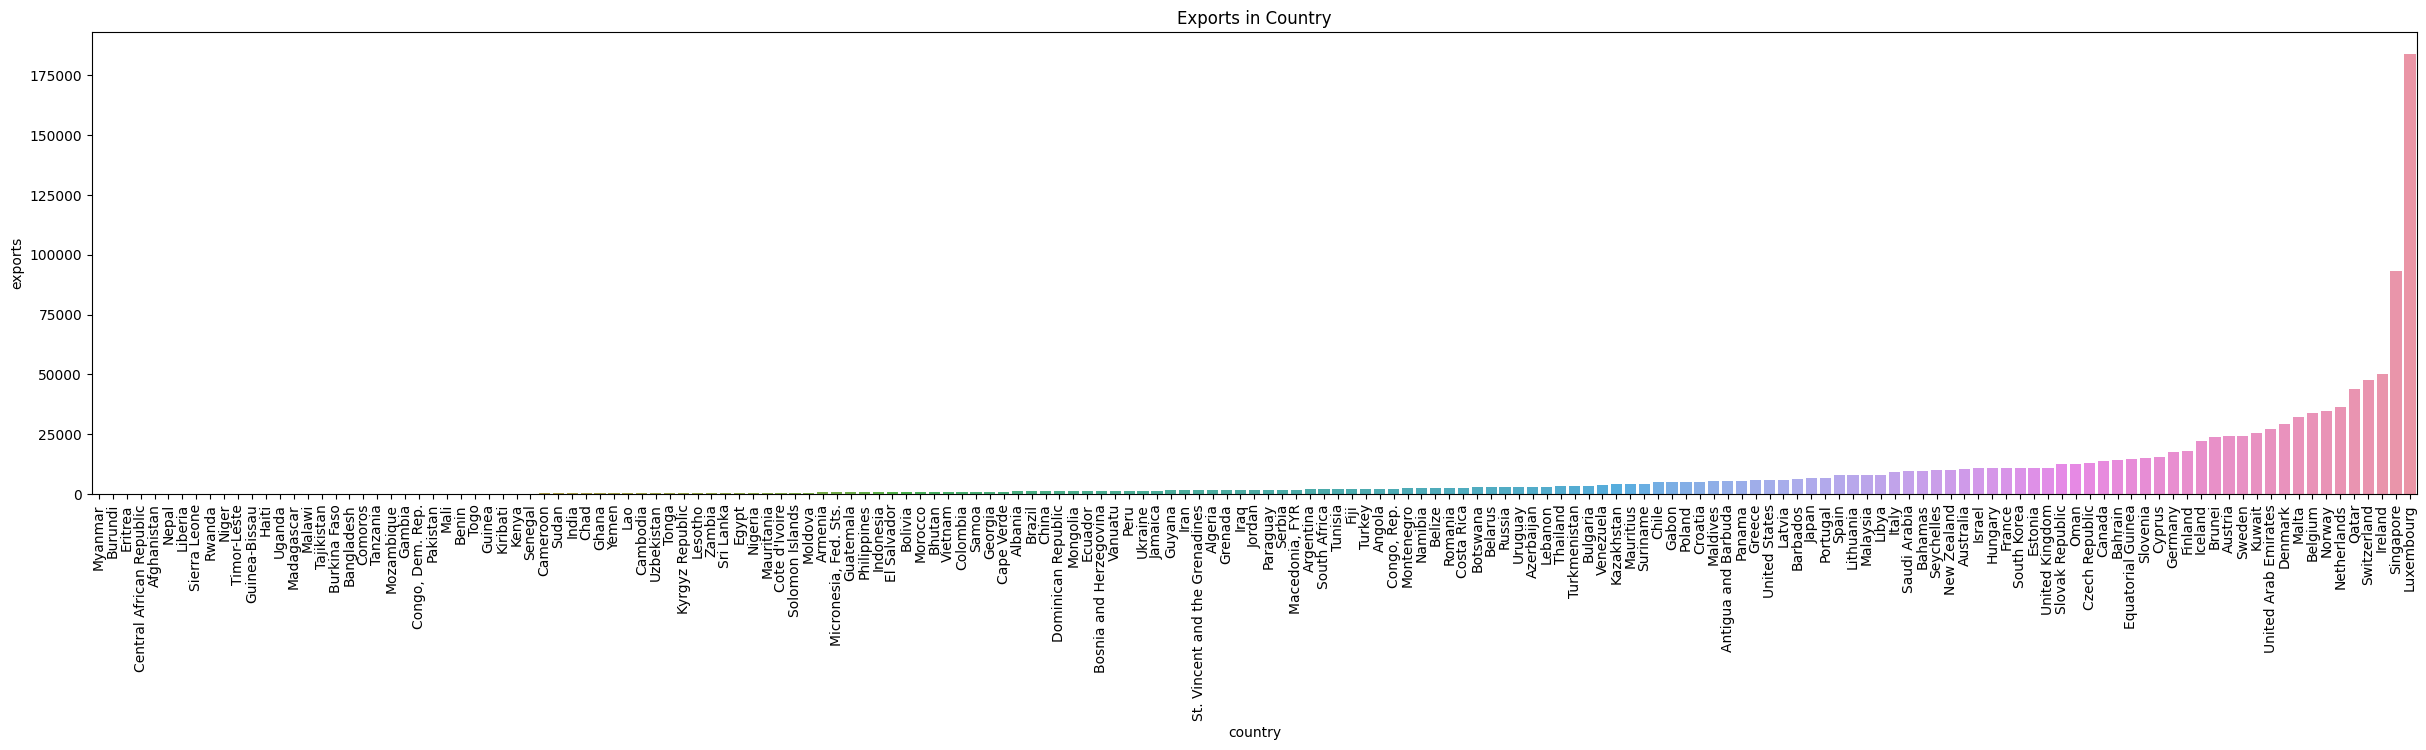

In [ ]:
plt.figure(figsize=(30,6))
child_mort = data[['country', 'exports']].sort_values('exports', ascending=True)      #creating bar plot for exports for each country (in ascending order)
ax = sns.barplot(x='country', y='exports', data=child_mort)
ax.set_title('Exports in Country')
plt.xticks(rotation = 90)
plt.show()

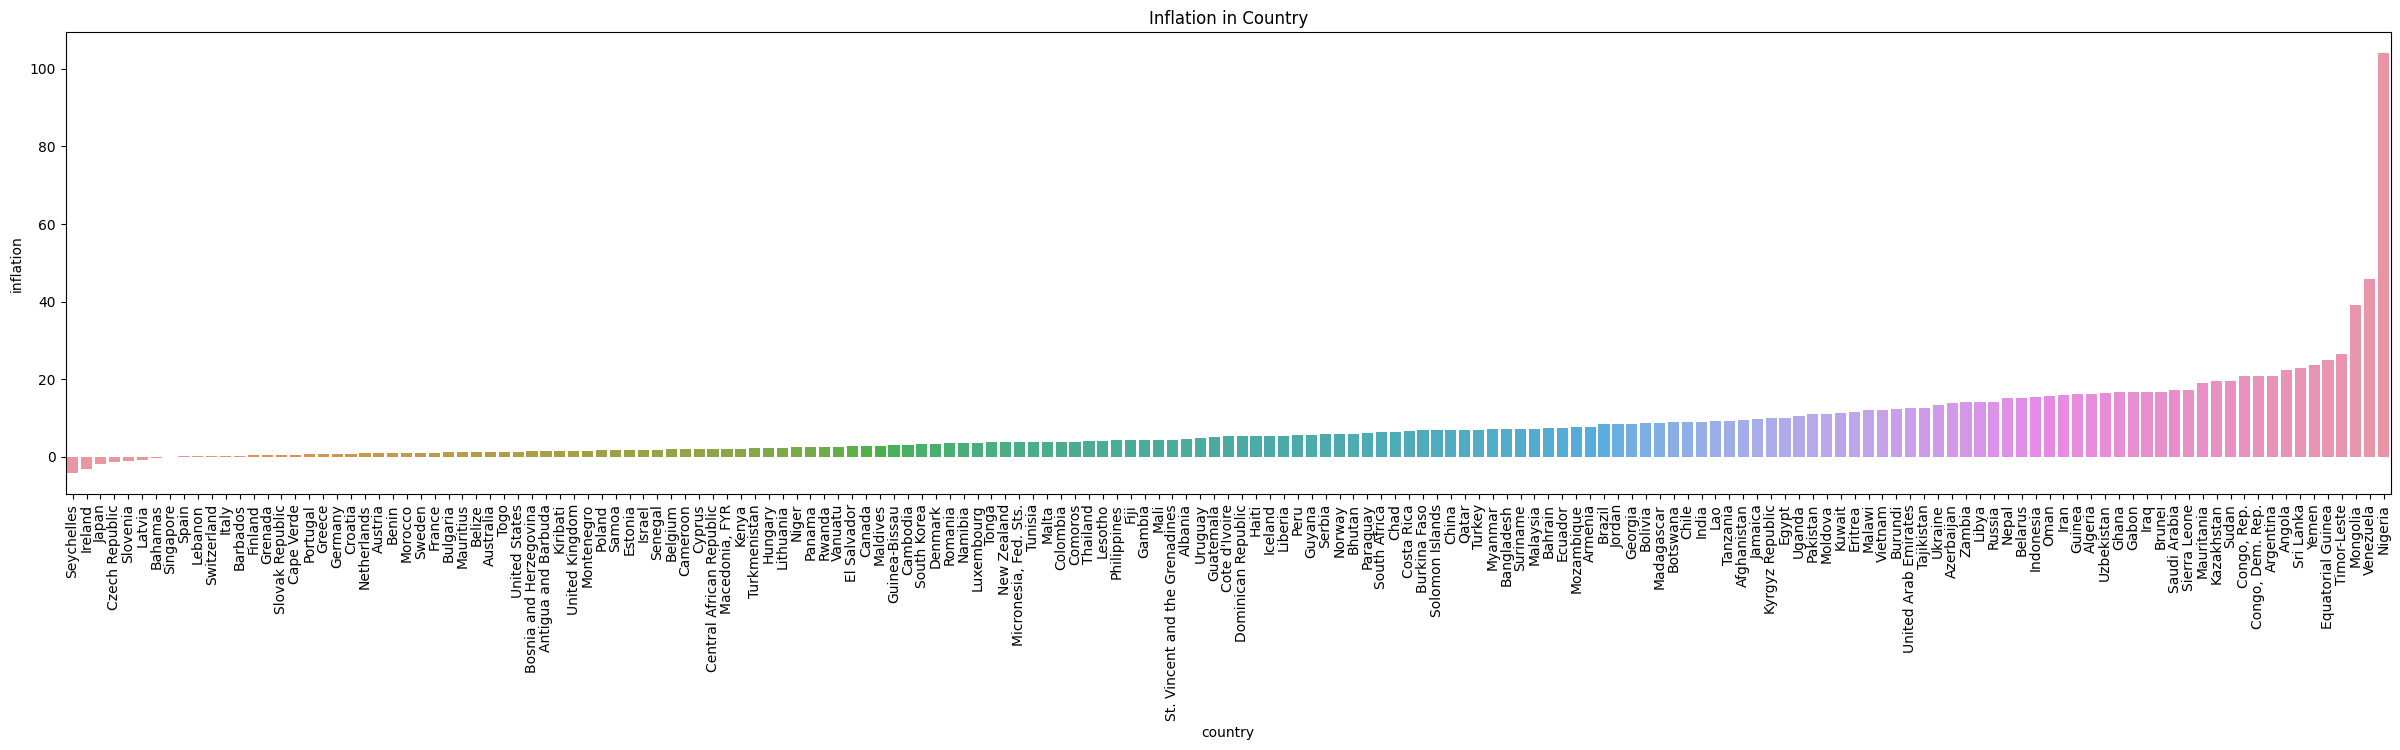

In [ ]:
plt.figure(figsize=(30,6))
child_mort = data[['country', 'inflation']].sort_values('inflation', ascending=True)      #creating bar plot for inflation for each country (in ascending order)
ax = sns.barplot(x='country', y='inflation', data=child_mort)
ax.set_title('Inflation in Country')
plt.xticks(rotation = 90)
plt.show()

<Axes: >

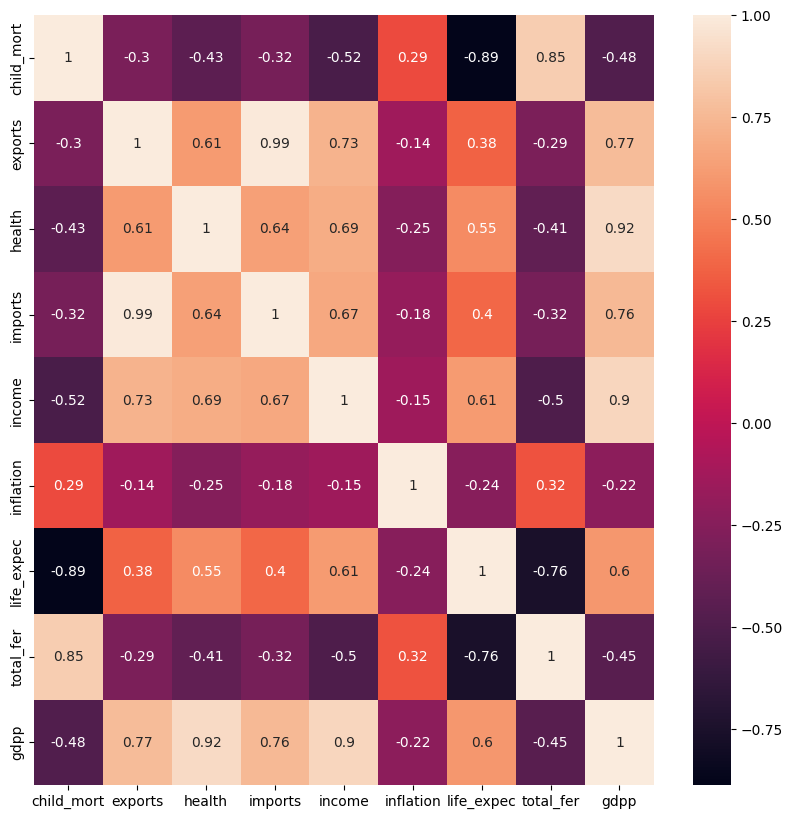

In [ ]:
plt.figure(figsize=(10,10))
corr = data.corr()
sns.heatmap(corr, annot=True)   #heatmap to visualise correlation matrix

#**2. Preprocessing the data**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
new = scaler.fit_transform(df)   #standardising the numerical data
newdf = pd.DataFrame(data= new , columns = columns)   
newdf

child_mort   exports    health   imports    income  inflation  \
0      1.291532 -0.411011 -0.565040 -0.432276 -0.808245   0.157336   
1     -0.538949 -0.350191 -0.439218 -0.313677 -0.375369  -0.312347   
2     -0.272833 -0.318526 -0.484826 -0.353720 -0.220844   0.789274   
3      2.007808 -0.291375 -0.532363 -0.345953 -0.585043   1.387054   
4     -0.695634 -0.104331 -0.178771  0.040735  0.101732  -0.601749   
..          ...       ...       ...       ...       ...        ...   
162   -0.225578 -0.336864 -0.501562 -0.342488 -0.738527  -0.489784   
163   -0.526514 -0.199393 -0.219310 -0.287205 -0.033542   3.616865   
164   -0.372315 -0.361463 -0.538488 -0.377572 -0.658404   0.409732   
165    0.448417 -0.392166 -0.550596 -0.418479 -0.658924   1.500916   
166    1.114951 -0.383952 -0.540498 -0.418445 -0.721358   0.590015   

     life_expec  total_fer      gdpp  
0     -1.619092   1.902882 -0.679180  
1      0.647866  -0.859973 -0.485623  
2      0.670423  -0.038404 -0.465376  
3     -1.179234   2.128151 -0.516268  
4      0.704258  -0.541946 -0.041817  
..          ...        ...       ...  
162   -0.852161   0.365754 -0.546913  
163    0.546361  -0.316678  0.029323  
164    0.286958  -0.661206 -0.637754  
165   -0.344633   1.140944 -0.637754  
166   -2.092785   1.624609 -0.629546  

[167 rows x 9 columns]

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
pca.fit(newdf)    
pca_data_standard = pca.transform(newdf)   #performed PCA on standardised data

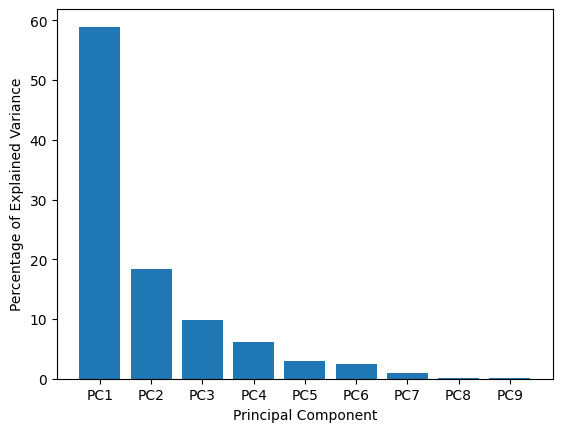

In [ ]:
var = np.round(pca.explained_variance_ratio_*100, decimals=2)    #calculating the %age of explained variance for each principal component
l = len(var)
labels = ['PC' + str(x) for x in range (1, l+1)]      #creating a list of labels for each principal component
plt.bar(x=range(1,l+1), height=var, tick_label = labels)   #plotting the variance
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.show()

Text(0, 0.5, 'PC2 - 18.45%')

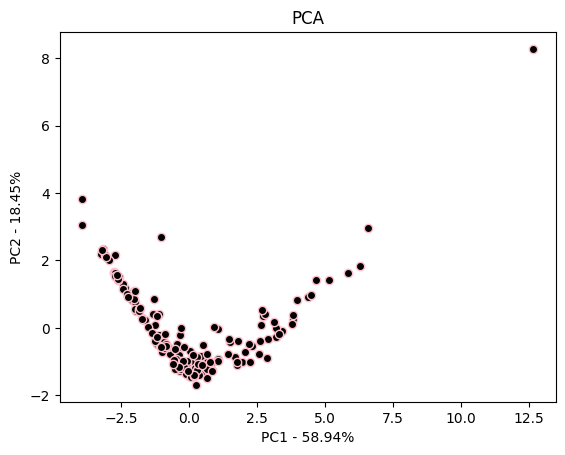

In [ ]:
pca_df = pd.DataFrame(pca_data_standard, columns=labels)
plt.scatter(pca_df.PC1, pca_df.PC2, color='black', edgecolors='pink')  #scatter plot to visualise projection of data onto first two PC obtained from PCA
plt.title('PCA')
plt.xlabel(f'PC1 - {var[0]}%')
plt.ylabel(f'PC2 - {var[1]}%')

In [ ]:
pca_df.drop(['PC5','PC6','PC7','PC8','PC9'], axis = 1, inplace=True)
pca_df

PC1       PC2       PC3       PC4
0   -2.635575  1.472267 -0.549489 -0.242326
1   -0.024206 -1.429892 -0.014123  0.450645
2   -0.459557 -0.675495  0.959355  0.218456
3   -2.722630  2.172332  0.600215 -0.433978
4    0.648597 -1.023437 -0.257430  0.289201
..        ...       ...       ...       ...
162 -1.175210 -0.275652 -0.667131  0.279628
163 -0.314228 -0.016266  3.680273  0.011835
164 -0.594449 -1.076335  0.528875  0.508854
165 -1.802372  0.588729  1.180851 -0.020241
166 -2.644505  1.571953 -0.174685 -0.178965

[167 rows x 4 columns]

#**3. K-means clustering**

**1. With PCA**

**i) Silhouette score**

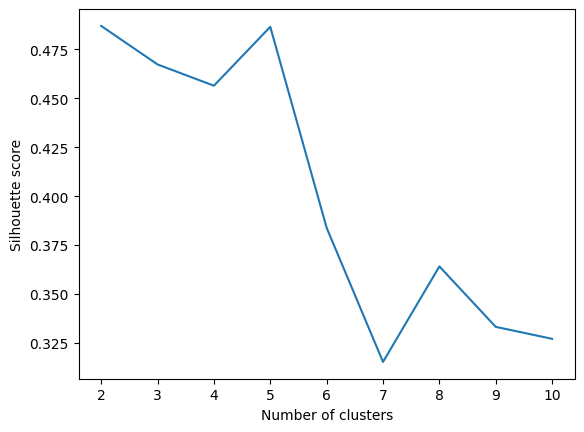

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil=[]
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300).fit(pca_df)   #KMeans class is instantiated with the number of clusters specified by k
  labels = kmeans.labels_     #resulting cluster labels from the model
  sil.append(silhouette_score(pca_df, labels, metric = 'euclidean'))   #appending silhouette score for each 'k' in the list
sns.lineplot(x = range(2, 11), y = sil);
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

**ii) Elbow method**

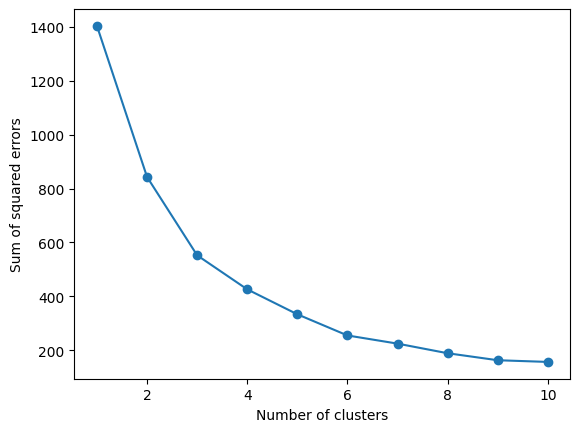

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sse = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300).fit(pca_df)
  sse.append(kmeans.inertia_)       #appending sum of squared errors for each 'k' in the list

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')
plt.show()

**elbow at k=4**

In [ ]:
kmeans = KMeans(n_clusters=4, init='random', n_init=10, max_iter=300, random_state=0)
kmeans.fit(pca_df)

KMeans(init='random', n_clusters=4, n_init=10, random_state=0)

In [ ]:
cluster = kmeans.fit_predict(pca_df)
cluster

array([0, 2, 2, 0, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 0, 2, 2, 2, 0,
       2, 3, 2, 0, 0, 2, 0, 3, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 3, 2,
       3, 2, 2, 2, 2, 0, 0, 2, 2, 3, 3, 0, 0, 2, 3, 0, 3, 2, 2, 0, 0, 2,
       0, 2, 3, 2, 2, 2, 0, 3, 3, 3, 2, 3, 2, 2, 0, 0, 3, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 3, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       3, 3, 0, 0, 3, 2, 0, 2, 2, 2, 2, 2, 2, 3, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 3, 0, 0, 2, 3, 2, 2, 0, 2, 3, 3, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0], dtype=int32)

In [ ]:
unique_cluster, counts = np.unique(cluster, return_counts=True)
percentages = counts / len(cluster) * 100

print("Number of samples:")
for i, label in enumerate(unique_cluster):    #calculated number of samples for each cluster
  print(f"Cluster {label}: {counts[i]}")
print("")

print("Percentage:")
for i, label in enumerate(unique_cluster):
  print(f"Cluster {label}: {percentages[i]:.2f}%")

Number of samples:
Cluster 0: 48
Cluster 1: 2
Cluster 2: 88
Cluster 3: 29

Percentage:
Cluster 0: 28.74%
Cluster 1: 1.20%
Cluster 2: 52.69%
Cluster 3: 17.37%


In [ ]:
silhouette_score(pca_df, cluster, metric = 'euclidean')

0.47680329371489033

In [ ]:
df_cluster = data
df_cluster['cluster']=cluster   #assigned the cluster to original dataset
df_cluster

country  child_mort  exports    health   imports  income  \
0            Afghanistan        90.2    55.30   41.9174   248.297    1610   
1                Albania        16.6  1145.20  267.8950  1987.740    9930   
2                Algeria        27.3  1712.64  185.9820  1400.440   12900   
3                 Angola       119.0  2199.19  100.6050  1514.370    5900   
4    Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   
..                   ...         ...      ...       ...       ...     ...   
162              Vanuatu        29.2  1384.02  155.9250  1565.190    2950   
163            Venezuela        17.1  3847.50  662.8500  2376.000   16500   
164              Vietnam        23.3   943.20   89.6040  1050.620    4490   
165                Yemen        56.3   393.00   67.8580   450.640    4480   
166               Zambia        83.1   540.20   85.9940   451.140    3280   

     inflation  life_expec  total_fer   gdpp  cluster  
0         9.44        56.2       5.82    553        0  
1         4.49        76.3       1.65   4090        2  
2        16.10        76.5       2.89   4460        2  
3        22.40        60.1       6.16   3530        0  
4         1.44        76.8       2.13  12200        2  
..         ...         ...        ...    ...      ...  
162       2.62        63.0       3.50   2970        2  
163      45.90        75.4       2.47  13500        2  
164      12.10        73.1       1.95   1310        2  
165      23.60        67.5       4.67   1310        0  
166      14.00        52.0       5.40   1460        0  

[167 rows x 11 columns]

**determining which cluster need help**

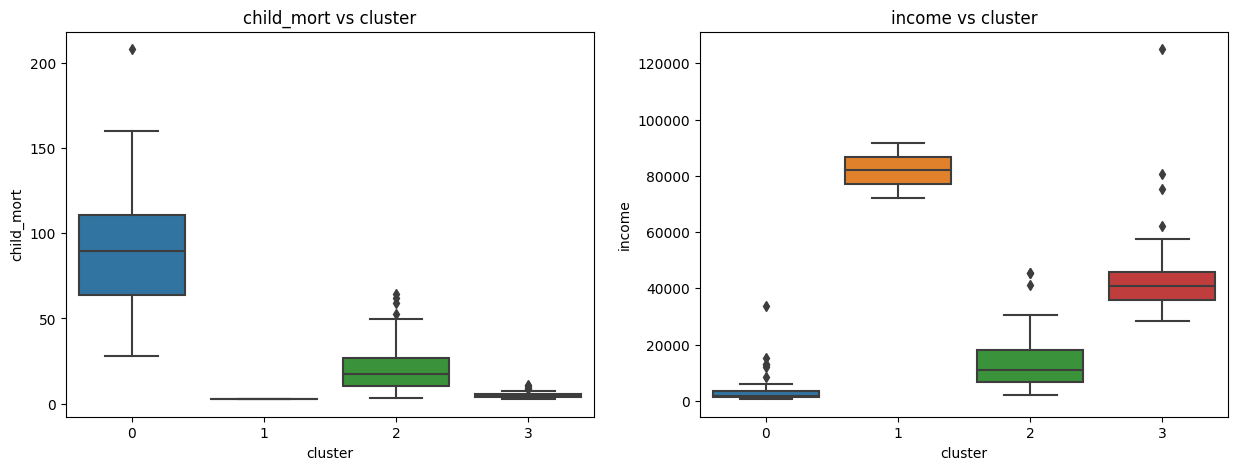

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x='cluster', y='child_mort', data=df_cluster);
plt.title('child_mort vs cluster')

plt.subplot(1,2,2)
sns.boxplot(x='cluster', y='income', data=df_cluster);
plt.title('income vs cluster')

plt.show()

**as the child_mort of cluster 1 and 3 are similar and cluster 1 has only 2 samples, so we can merge the two clusters into one**

In [ ]:
df_cluster['cluster'] = df_cluster['cluster'].replace([3], 1)

In [ ]:
len(df_cluster[df_cluster.cluster == 1])

31

In [ ]:
len(df_cluster[df_cluster.cluster == 3])

0

In [ ]:
df_cluster['cluster'].loc[df_cluster['cluster'] == 0] = 'Need Help'
df_cluster['cluster'].loc[df_cluster['cluster'] == 1] = 'No Help Needed'
df_cluster['cluster'].loc[df_cluster['cluster'] == 2] = 'Might Need Help'

**visualising clusters using pair plots**

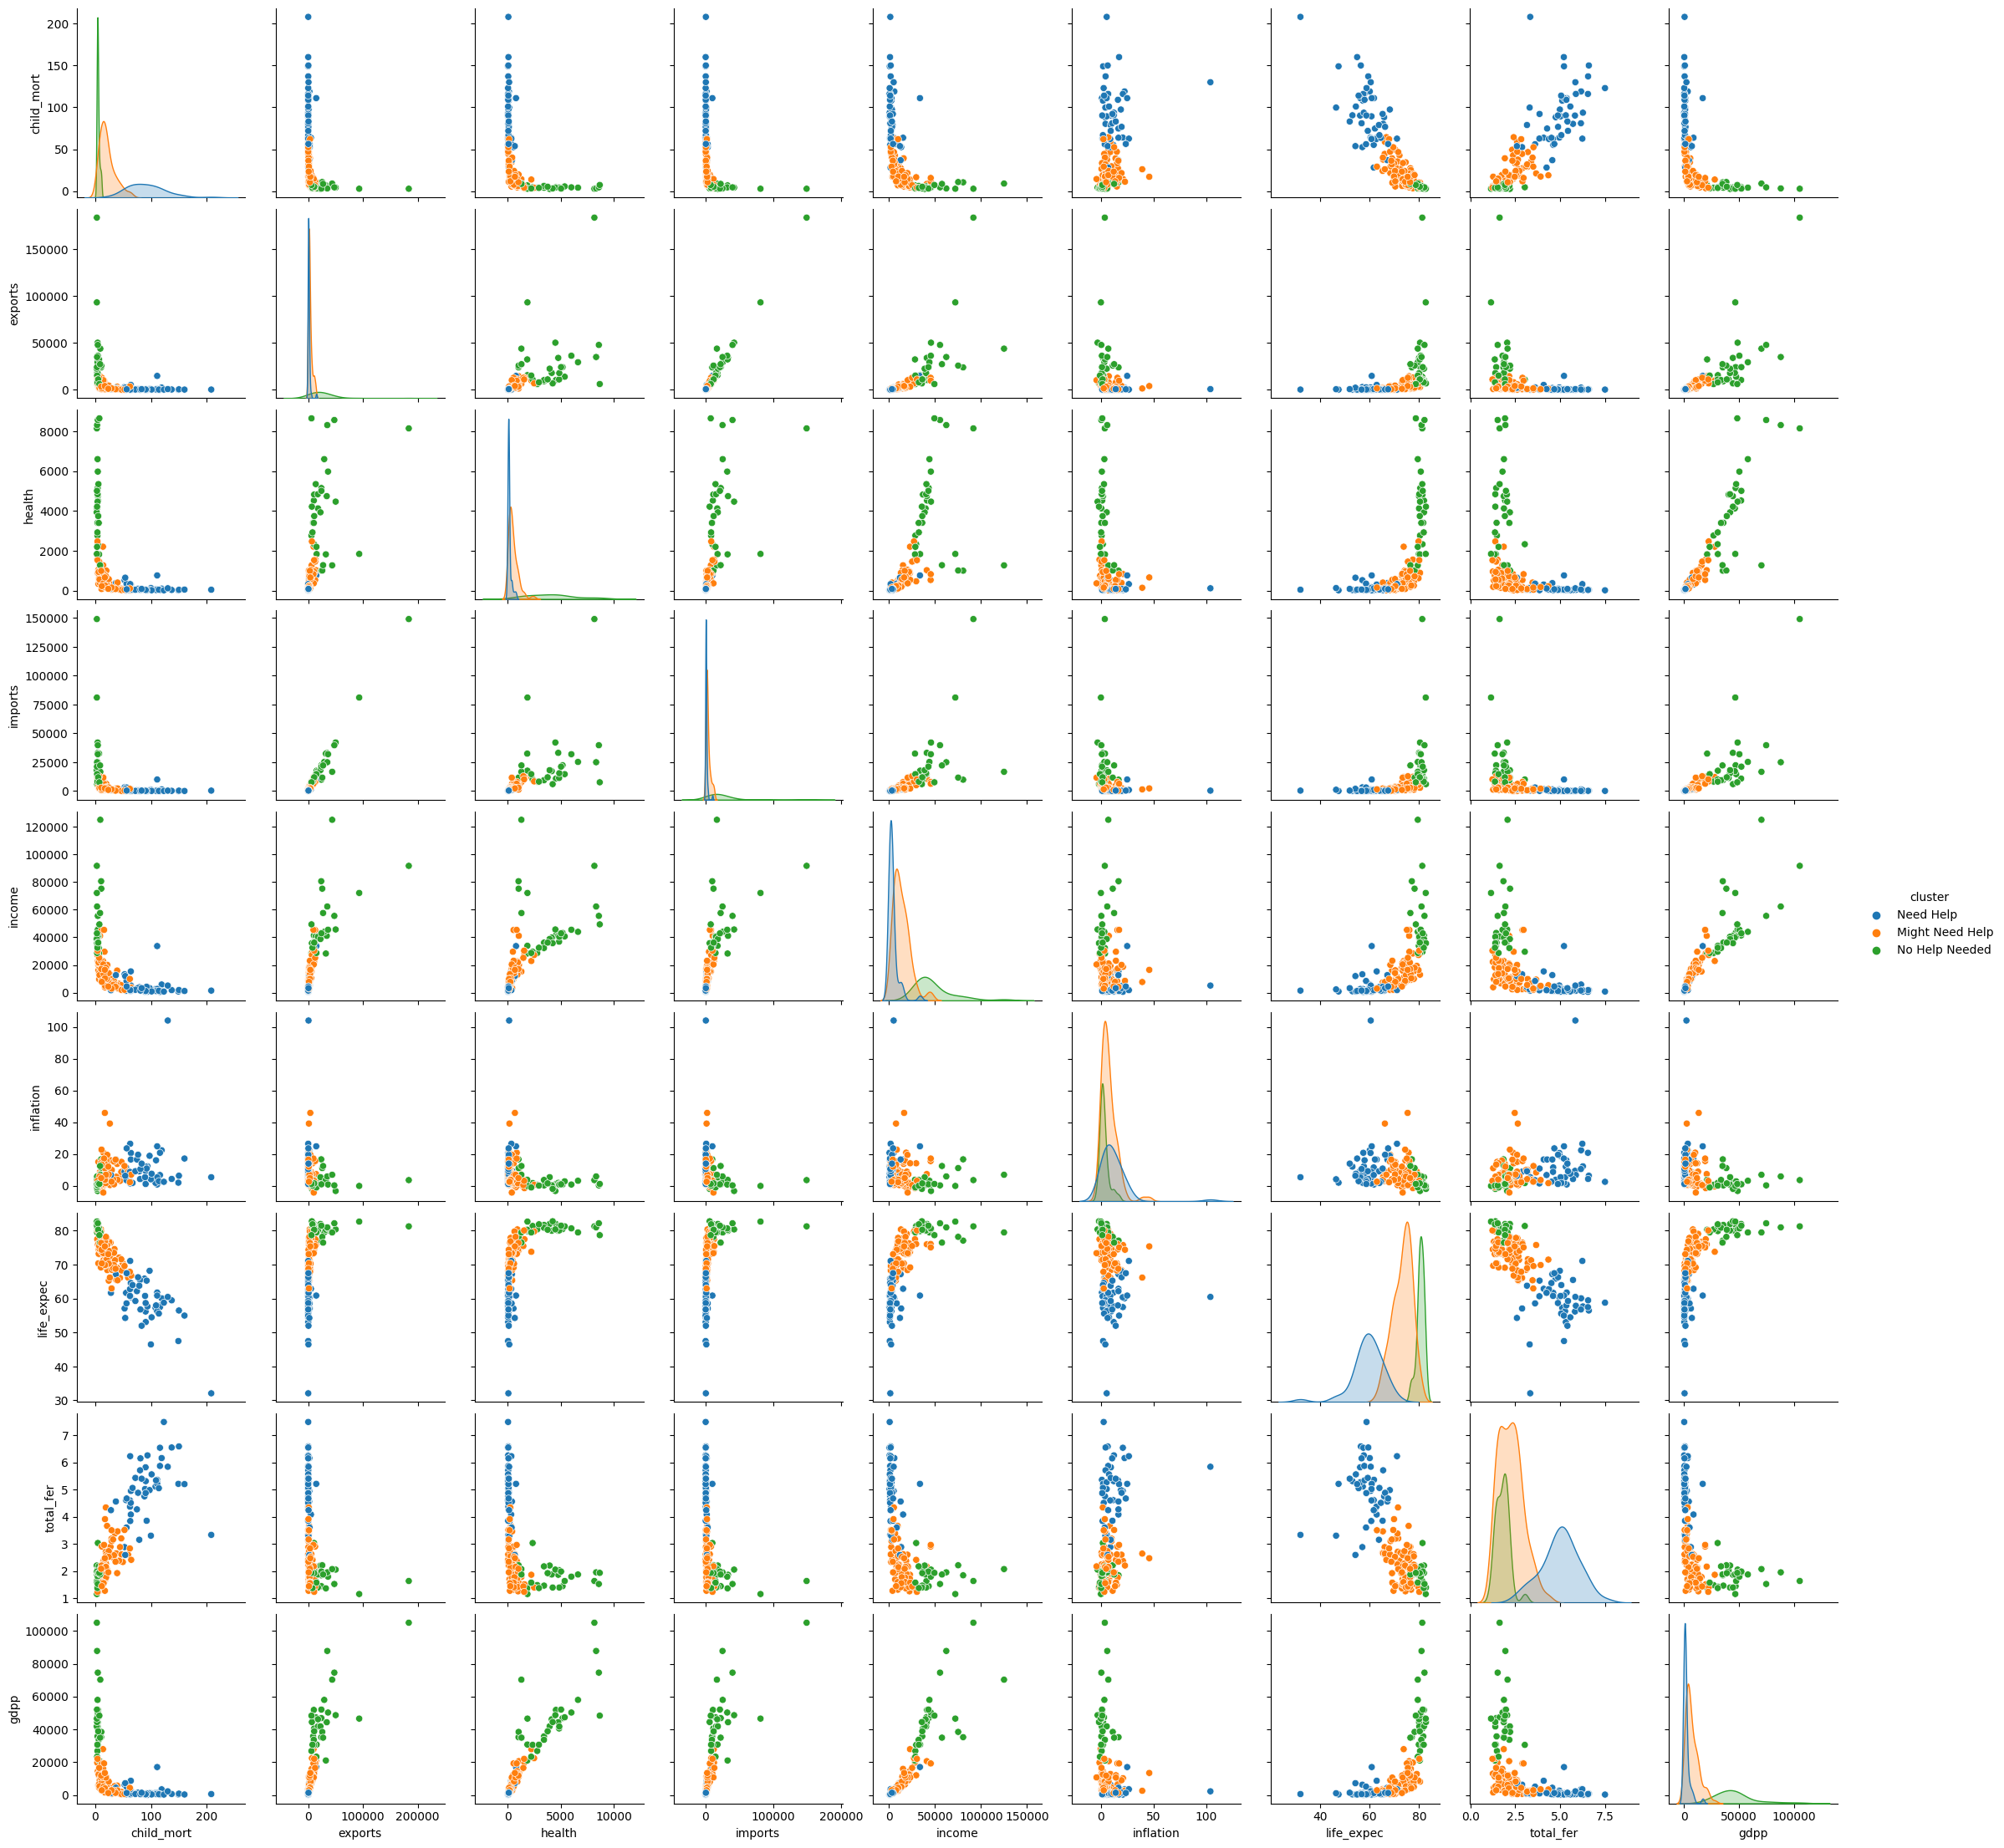

In [ ]:
sns.pairplot(df_cluster, hue = "cluster")

**visualising clusters in the world map**

In [ ]:
import plotly.express as px
fig = px.choropleth(df_cluster[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    color = df_cluster['cluster'],
                    color_discrete_map = {'Need Help':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Blue'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.show(engine = 'kaleido')

**visualising by continent**

In [ ]:
fig = px.choropleth(df_cluster[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title='Africa',
                    color = df_cluster['cluster'],
                    color_discrete_map = {'Need Help':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Blue'},
                    projection='equirectangular',
                    scope='africa')
fig.update_geos(fitbounds = "locations", visible = True)
fig.show(engine = 'kaleido')

In [ ]:
fig = px.choropleth(df_cluster[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title='Asia',
                    color = df_cluster['cluster'],
                    color_discrete_map = {'Need Help':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Blue'},
                    projection='equirectangular',
                    scope='asia')
fig.update_geos(fitbounds = "locations", visible = True)
fig.show(engine = 'kaleido')

In [ ]:
fig = px.choropleth(df_cluster[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title='Europe',
                    color = df_cluster['cluster'],
                    color_discrete_map = {'Need Help':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Blue'},
                    projection='equirectangular',
                    scope='europe')
fig.update_geos(fitbounds = "locations", visible = True)
fig.show(engine = 'kaleido')

In [ ]:
fig = px.choropleth(df_cluster[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title='North america',
                    color = df_cluster['cluster'],
                    color_discrete_map = {'Need Help':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Blue'},
                    projection='equirectangular',
                    scope='north america')
fig.update_geos(fitbounds = "locations", visible = True)
fig.show(engine = 'kaleido')

In [ ]:
fig = px.choropleth(df_cluster[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title='South america',
                    color = df_cluster['cluster'],
                    color_discrete_map = {'Need Help':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Blue'},
                    projection='equirectangular',
                    scope='south america')
fig.update_geos(fitbounds = "locations", visible = True)
fig.show(engine = 'kaleido')

**2. Without PCA**

**i) Silhouette score**

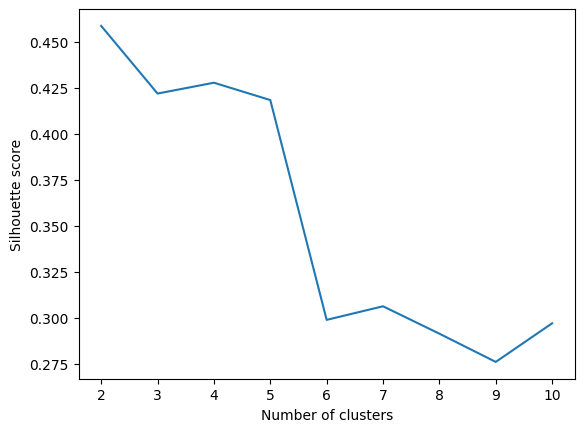

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil=[]
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300).fit(newdf)   #KMeans class is instantiated with the number of clusters specified by k
  labels = kmeans.labels_     #resulting cluster labels from the model
  sil.append(silhouette_score(newdf, labels, metric = 'euclidean'))   #appending silhouette score for each 'k' in the list
sns.lineplot(x = range(2, 11), y = sil);
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

**ii) Elbow method**

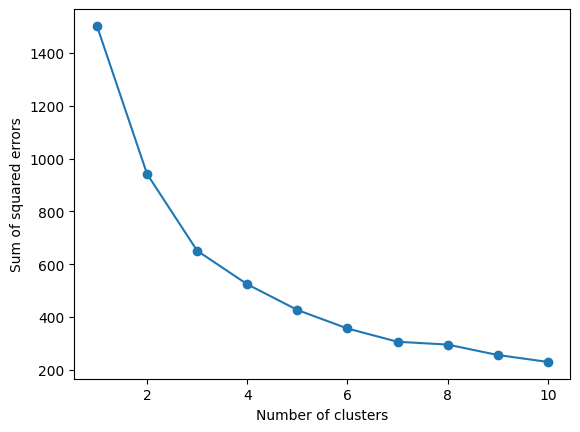

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sse = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300).fit(newdf)
  sse.append(kmeans.inertia_)       #appending sum of squared errors for each 'k' in the list

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')
plt.show()

**elbow at k=3**

In [ ]:
kmeans2 = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, random_state=0)
kmeans2.fit(newdf)

KMeans(init='random', n_clusters=3, n_init=10, random_state=0)

In [ ]:
cluster_p = kmeans2.fit_predict(newdf)
cluster_p

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0], dtype=int32)

In [ ]:
unique_cluster, counts = np.unique(cluster_p, return_counts=True)
percentages = counts / len(cluster_p) * 100

print("Number of samples:")
for i, label in enumerate(unique_cluster):    #calculated number of samples for each cluster
  print(f"Cluster {label}: {counts[i]}")
print("")

print("Percentage:")
for i, label in enumerate(unique_cluster):
  print(f"Cluster {label}: {percentages[i]:.2f}%")

Number of samples:
Cluster 0: 48
Cluster 1: 91
Cluster 2: 28

Percentage:
Cluster 0: 28.74%
Cluster 1: 54.49%
Cluster 2: 16.77%


In [ ]:
silhouette_score(newdf, cluster_p, metric = 'euclidean')

0.4218615812599681

In [ ]:
df_cluster_p = data
df_cluster_p['cluster']=cluster_p   #assigned the cluster to original dataset
df_cluster_p

country  child_mort  exports    health   imports  income  \
0            Afghanistan        90.2    55.30   41.9174   248.297    1610   
1                Albania        16.6  1145.20  267.8950  1987.740    9930   
2                Algeria        27.3  1712.64  185.9820  1400.440   12900   
3                 Angola       119.0  2199.19  100.6050  1514.370    5900   
4    Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   
..                   ...         ...      ...       ...       ...     ...   
162              Vanuatu        29.2  1384.02  155.9250  1565.190    2950   
163            Venezuela        17.1  3847.50  662.8500  2376.000   16500   
164              Vietnam        23.3   943.20   89.6040  1050.620    4490   
165                Yemen        56.3   393.00   67.8580   450.640    4480   
166               Zambia        83.1   540.20   85.9940   451.140    3280   

     inflation  life_expec  total_fer   gdpp  cluster  
0         9.44        56.2       5.82    553        0  
1         4.49        76.3       1.65   4090        1  
2        16.10        76.5       2.89   4460        1  
3        22.40        60.1       6.16   3530        0  
4         1.44        76.8       2.13  12200        1  
..         ...         ...        ...    ...      ...  
162       2.62        63.0       3.50   2970        1  
163      45.90        75.4       2.47  13500        1  
164      12.10        73.1       1.95   1310        1  
165      23.60        67.5       4.67   1310        0  
166      14.00        52.0       5.40   1460        0  

[167 rows x 11 columns]

**determining which cluster need help**

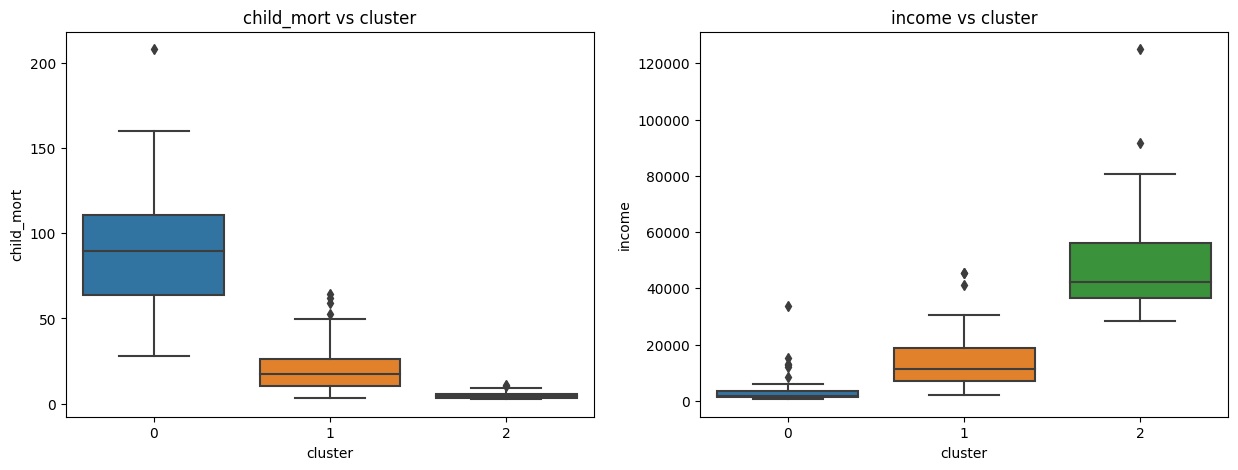

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x='cluster', y='child_mort', data=df_cluster_p);
plt.title('child_mort vs cluster')

plt.subplot(1,2,2)
sns.boxplot(x='cluster', y='income', data=df_cluster_p);
plt.title('income vs cluster')

plt.show()

In [ ]:
df_cluster_p['cluster'].loc[df_cluster_p['cluster'] == 0] = 'Need Help'
df_cluster_p['cluster'].loc[df_cluster_p['cluster'] == 1] = 'Might Need Help'
df_cluster_p['cluster'].loc[df_cluster_p['cluster'] == 2] = 'No Help Needed'

**visualising clusters using pair plots**

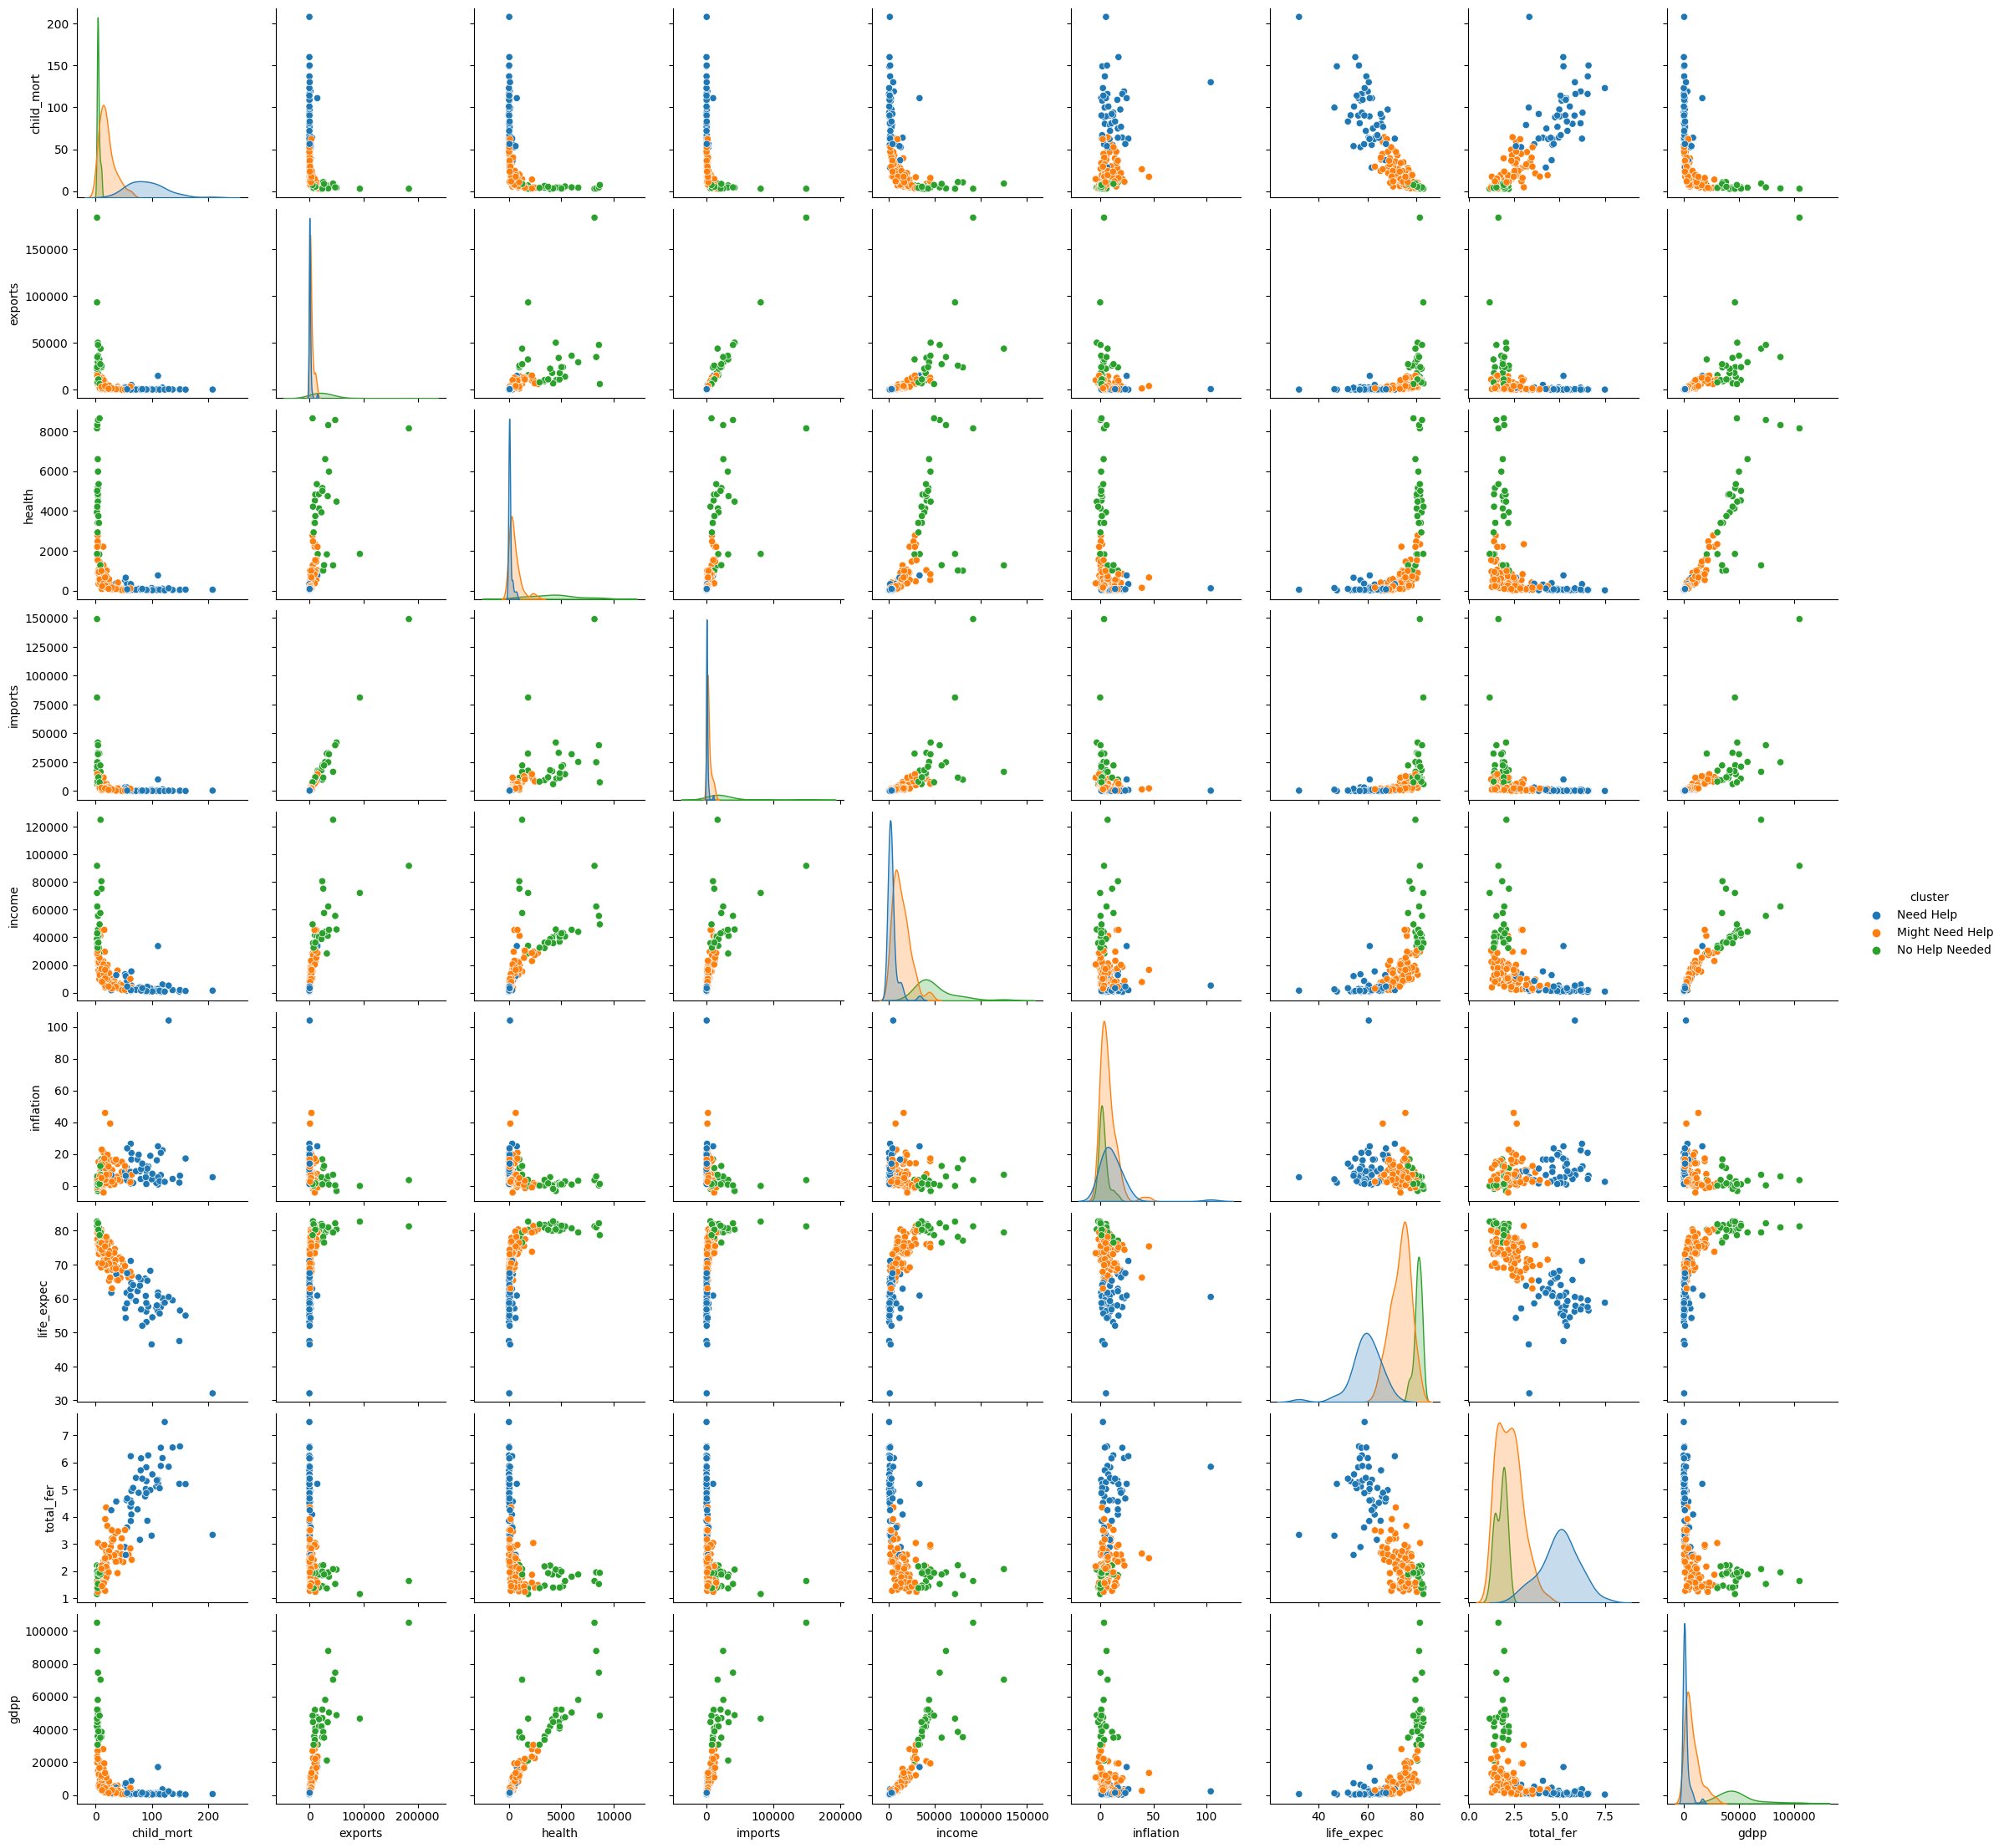

In [ ]:
sns.pairplot(df_cluster_p, hue = "cluster")

**visualising clusters in the world map**

In [ ]:
import plotly.express as px
fig = px.choropleth(df_cluster_p[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    color = df_cluster_p['cluster'],
                    color_discrete_map = {'Need Help':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Blue'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.show(engine = 'kaleido')

**visualising by continent**

In [ ]:
fig = px.choropleth(df_cluster_p[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title='Africa',
                    color = df_cluster_p['cluster'],
                    color_discrete_map = {'Need Help':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Blue'},
                    projection='equirectangular',
                    scope='africa')
fig.update_geos(fitbounds = "locations", visible = True)
fig.show(engine = 'kaleido')

In [ ]:
fig = px.choropleth(df_cluster_p[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title='Asia',
                    color = df_cluster_p['cluster'],
                    color_discrete_map = {'Need Help':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Blue'},
                    projection='equirectangular',
                    scope='asia')
fig.update_geos(fitbounds = "locations", visible = True)
fig.show(engine = 'kaleido')

In [ ]:
fig = px.choropleth(df_cluster_p[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title='Europe',
                    color = df_cluster_p['cluster'],
                    color_discrete_map = {'Need Help':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Blue'},
                    projection='equirectangular',
                    scope='europe')
fig.update_geos(fitbounds = "locations", visible = True)
fig.show(engine = 'kaleido')

In [ ]:
fig = px.choropleth(df_cluster_p[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title='North america',
                    color = df_cluster_p['cluster'],
                    color_discrete_map = {'Need Help':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Blue'},
                    projection='equirectangular',
                    scope='north america')
fig.update_geos(fitbounds = "locations", visible = True)
fig.show(engine = 'kaleido')

In [ ]:
fig = px.choropleth(df_cluster_p[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title='South america',
                    color = df_cluster_p['cluster'],
                    color_discrete_map = {'Need Help':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Blue'},
                    projection='equirectangular',
                    scope='south america')
fig.update_geos(fitbounds = "locations", visible = True)
fig.show(engine = 'kaleido')

#**4. Hierarchical clustering**

**1. With PCA**

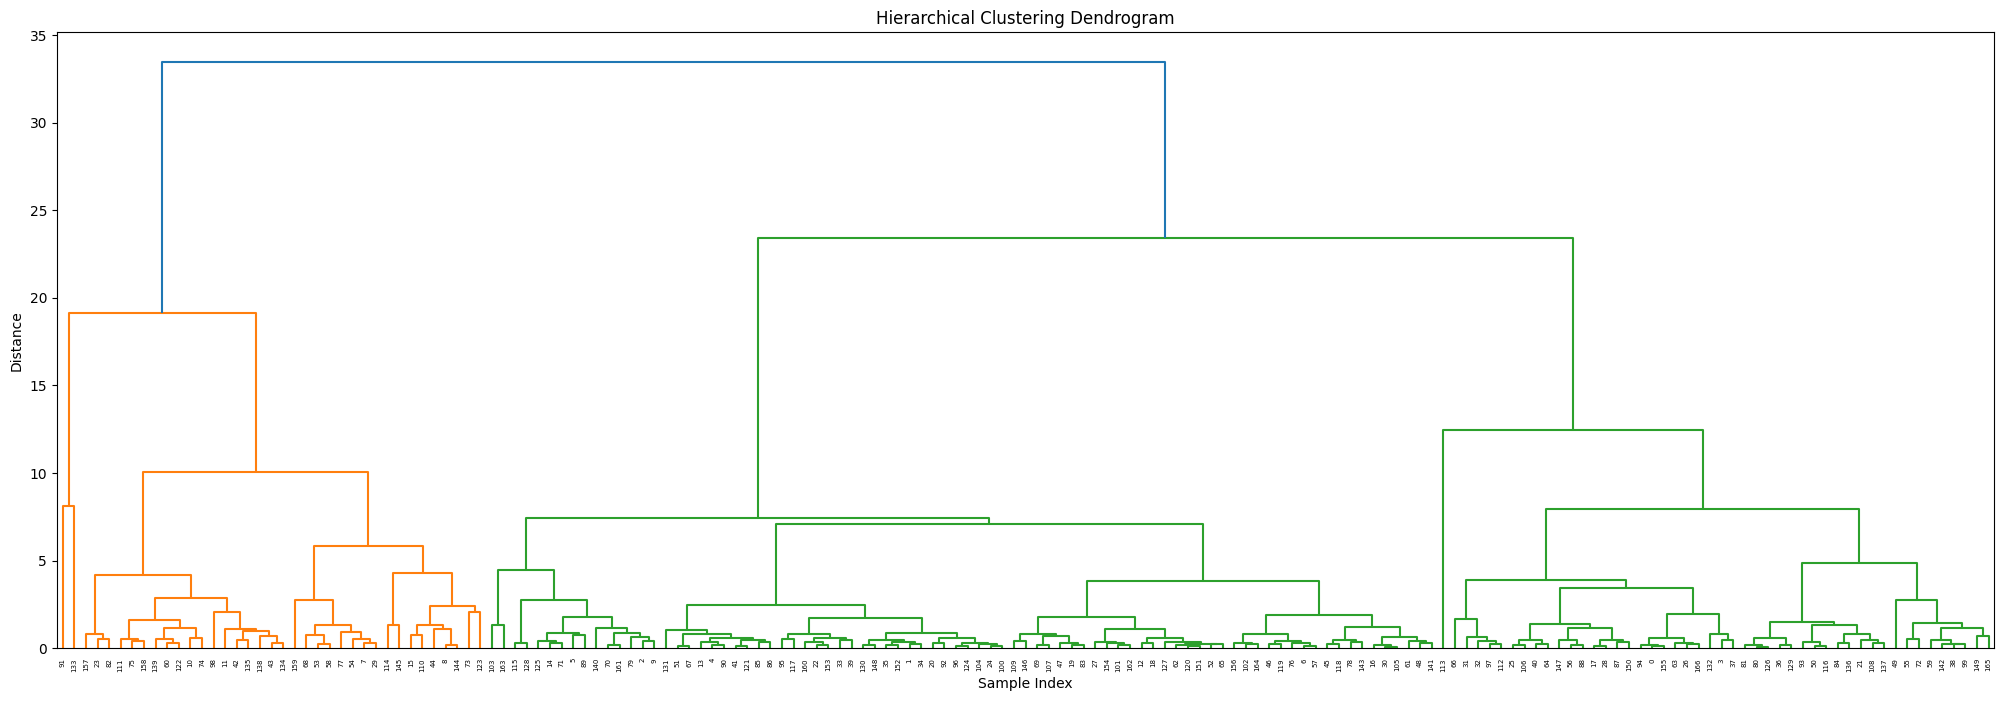

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(pca_df, method='ward', metric='euclidean')   #created a linkage matrix

plt.figure(figsize=(25,8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z)    #plotting a dendogram
plt.show()

**after the 3rd level, we reach the elbow point, so taking number of clusters as 3**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
np.random.seed(0)
clustering = AgglomerativeClustering(n_clusters=3, metric='euclidean')
clustering.fit(pca_df)

AgglomerativeClustering(metric='euclidean', n_clusters=3)

In [ ]:
cluster2 = clustering.fit_predict(pca_df)
cluster2

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

In [ ]:
unique_cluster, counts = np.unique(cluster2, return_counts=True)
percentages = counts / len(cluster2) * 100

print("Number of samples:")
for i, label in enumerate(unique_cluster):    #calculated number of samples for each cluster
  print(f"Cluster {label}: {counts[i]}")
print("")

print("Percentage:")
for i, label in enumerate(unique_cluster):
  print(f"Cluster {label}: {percentages[i]:.2f}%")

Number of samples:
Cluster 0: 37
Cluster 1: 48
Cluster 2: 82

Percentage:
Cluster 0: 22.16%
Cluster 1: 28.74%
Cluster 2: 49.10%


In [ ]:
print(f"Silhouette_score: {silhouette_score(pca_df, cluster2, metric = 'euclidean')}")

Silhouette_score: 0.45117451175188816


In [ ]:
df_cluster2 = data
df_cluster2['cluster']=cluster2   #assigned the cluster to original dataset
df_cluster2

country  child_mort  exports    health   imports  income  \
0            Afghanistan        90.2    55.30   41.9174   248.297    1610   
1                Albania        16.6  1145.20  267.8950  1987.740    9930   
2                Algeria        27.3  1712.64  185.9820  1400.440   12900   
3                 Angola       119.0  2199.19  100.6050  1514.370    5900   
4    Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   
..                   ...         ...      ...       ...       ...     ...   
162              Vanuatu        29.2  1384.02  155.9250  1565.190    2950   
163            Venezuela        17.1  3847.50  662.8500  2376.000   16500   
164              Vietnam        23.3   943.20   89.6040  1050.620    4490   
165                Yemen        56.3   393.00   67.8580   450.640    4480   
166               Zambia        83.1   540.20   85.9940   451.140    3280   

     inflation  life_expec  total_fer   gdpp  cluster  
0         9.44        56.2       5.82    553        1  
1         4.49        76.3       1.65   4090        2  
2        16.10        76.5       2.89   4460        2  
3        22.40        60.1       6.16   3530        1  
4         1.44        76.8       2.13  12200        2  
..         ...         ...        ...    ...      ...  
162       2.62        63.0       3.50   2970        2  
163      45.90        75.4       2.47  13500        2  
164      12.10        73.1       1.95   1310        2  
165      23.60        67.5       4.67   1310        1  
166      14.00        52.0       5.40   1460        1  

[167 rows x 11 columns]

**determining which cluster needs help**

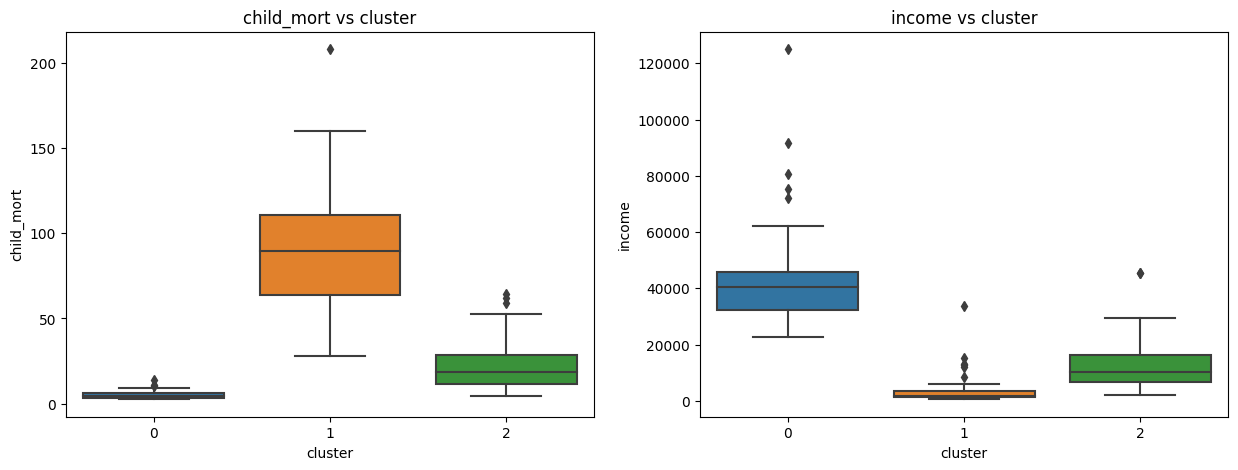

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x='cluster', y='child_mort', data=df_cluster2);
plt.title('child_mort vs cluster')

plt.subplot(1,2,2)
sns.boxplot(x='cluster', y='income', data=df_cluster2);
plt.title('income vs cluster')

plt.show()

In [ ]:
df_cluster2['cluster'].loc[df_cluster2['cluster'] == 0] = 'No Help Needed'
df_cluster2['cluster'].loc[df_cluster2['cluster'] == 1] = 'Need Help'
df_cluster2['cluster'].loc[df_cluster2['cluster'] == 2] = 'Might Need Help'

**visualising clusters using pair plots**

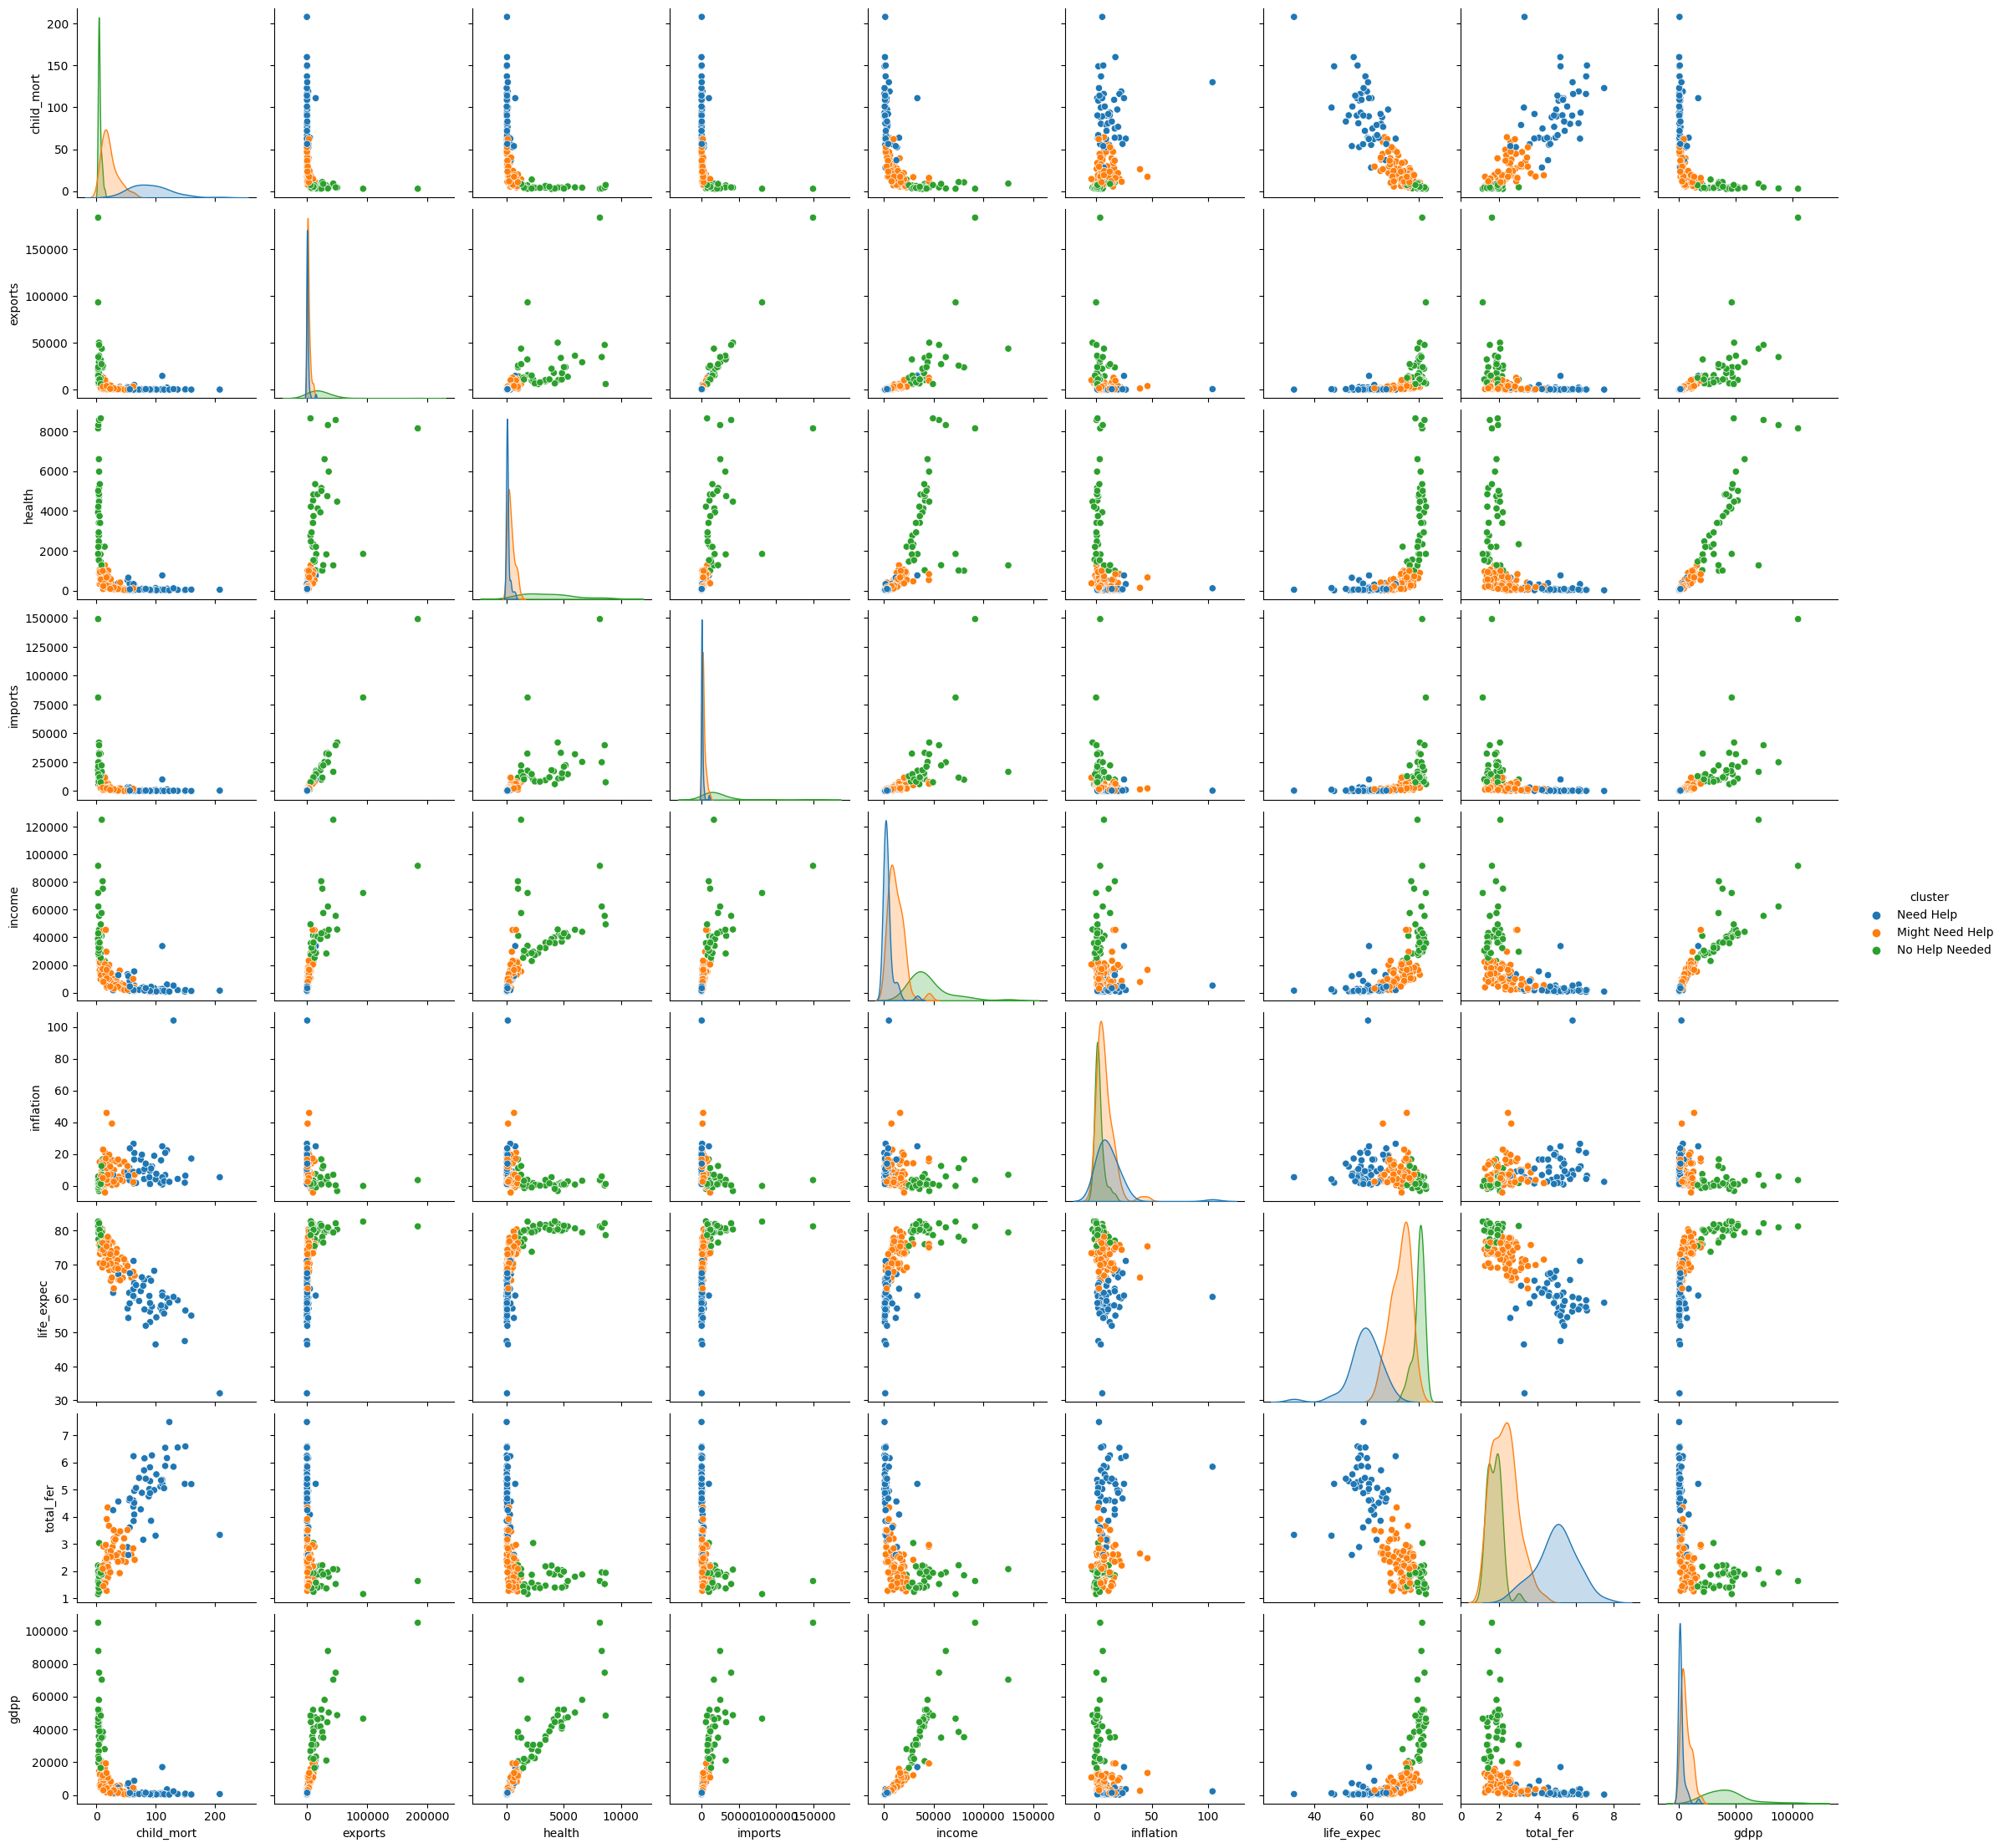

In [ ]:
sns.pairplot(df_cluster2, hue = "cluster")

**visualising clusters in the world map**

In [ ]:
import plotly.express as px
fig = px.choropleth(df_cluster2[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    color = df_cluster2['cluster'],
                    color_discrete_map = {'Need Help':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Blue'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.show(engine = 'kaleido')

**visualising by continent**

In [ ]:
fig = px.choropleth(df_cluster2[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title='Africa',
                    color = df_cluster2['cluster'],
                    color_discrete_map = {'Need Help':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Blue'},
                    projection='equirectangular',
                    scope='africa')
fig.update_geos(fitbounds = "locations", visible = True)
fig.show(engine = 'kaleido')

In [ ]:
fig = px.choropleth(df_cluster2[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title='Asia',
                    color = df_cluster2['cluster'],
                    color_discrete_map = {'Need Help':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Blue'},
                    projection='equirectangular',
                    scope='asia')
fig.update_geos(fitbounds = "locations", visible = True)
fig.show(engine = 'kaleido')

In [ ]:
fig = px.choropleth(df_cluster2[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title='Europe',
                    color = df_cluster2['cluster'],
                    color_discrete_map = {'Need Help':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Blue'},
                    projection='equirectangular',
                    scope='europe')
fig.update_geos(fitbounds = "locations", visible = True)
fig.show(engine = 'kaleido')

In [ ]:
fig = px.choropleth(df_cluster2[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title='North america',
                    color = df_cluster2['cluster'],
                    color_discrete_map = {'Need Help':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Blue'},
                    projection='equirectangular',
                    scope='north america')
fig.update_geos(fitbounds = "locations", visible = True)
fig.show(engine = 'kaleido')

In [ ]:
fig = px.choropleth(df_cluster2[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title='South america',
                    color = df_cluster2['cluster'],
                    color_discrete_map = {'Need Help':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Blue'},
                    projection='equirectangular',
                    scope='south america')
fig.update_geos(fitbounds = "locations", visible = True)
fig.show(engine = 'kaleido')

**2. Without PCA**

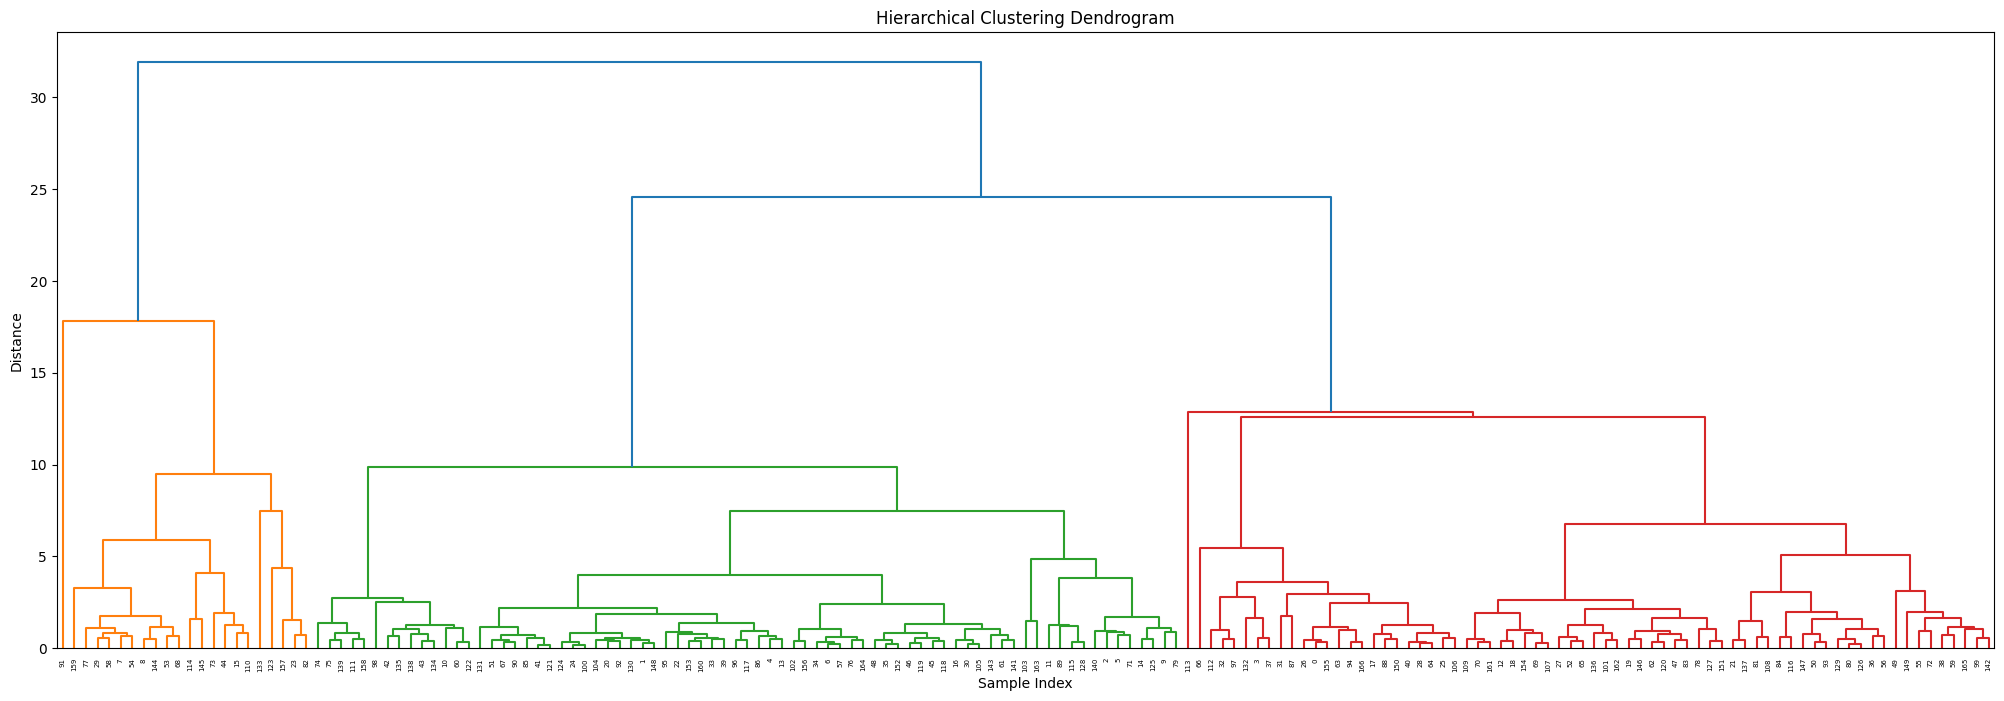

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z_p = linkage(newdf, method='ward', metric='euclidean')   #created a linkage matrix

plt.figure(figsize=(25,8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z_p)    #plotting a dendogram
plt.show()

**after the 3rd level, we reach the elbow point, so taking number of clusters as 3**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
np.random.seed(0)
clustering = AgglomerativeClustering(n_clusters=3, metric='euclidean')
clustering.fit(newdf)

AgglomerativeClustering(metric='euclidean', n_clusters=3)

In [ ]:
cluster2_p = clustering.fit_predict(newdf)
cluster2_p

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2, 0, 2, 1, 1, 1, 2, 1,
       2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2,
       0, 2, 2, 1, 2, 1, 1, 2, 1, 0, 0, 1, 1, 2, 0, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 0, 1, 1, 2, 1, 0, 2, 2, 2, 0, 1, 2, 1, 1, 0, 1, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1,
       0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2, 1, 1, 2, 1, 2, 2,
       1, 0, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 0, 0, 1, 1, 2, 1, 1, 1, 2, 2,
       1, 1, 2, 0, 2, 0, 2, 1, 1, 2, 2, 1, 1])

In [ ]:
unique_cluster, counts = np.unique(cluster2_p, return_counts=True)
percentages = counts / len(cluster2_p) * 100

print("Number of samples:")
for i, label in enumerate(unique_cluster):    #calculated number of samples for each cluster
  print(f"Cluster {label}: {counts[i]}")
print("")

print("Percentage:")
for i, label in enumerate(unique_cluster):
  print(f"Cluster {label}: {percentages[i]:.2f}%")

Number of samples:
Cluster 0: 22
Cluster 1: 70
Cluster 2: 75

Percentage:
Cluster 0: 13.17%
Cluster 1: 41.92%
Cluster 2: 44.91%


In [ ]:
print(f"Silhouette_score: {silhouette_score(newdf, cluster2_p, metric = 'euclidean')}")

Silhouette_score: 0.34936415582762026


In [ ]:
df_cluster2_p = data
df_cluster2_p['cluster']=cluster2_p   #assigned the cluster to original dataset
df_cluster2_p

country  child_mort  exports    health   imports  income  \
0            Afghanistan        90.2    55.30   41.9174   248.297    1610   
1                Albania        16.6  1145.20  267.8950  1987.740    9930   
2                Algeria        27.3  1712.64  185.9820  1400.440   12900   
3                 Angola       119.0  2199.19  100.6050  1514.370    5900   
4    Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   
..                   ...         ...      ...       ...       ...     ...   
162              Vanuatu        29.2  1384.02  155.9250  1565.190    2950   
163            Venezuela        17.1  3847.50  662.8500  2376.000   16500   
164              Vietnam        23.3   943.20   89.6040  1050.620    4490   
165                Yemen        56.3   393.00   67.8580   450.640    4480   
166               Zambia        83.1   540.20   85.9940   451.140    3280   

     inflation  life_expec  total_fer   gdpp  cluster  
0         9.44        56.2       5.82    553        1  
1         4.49        76.3       1.65   4090        2  
2        16.10        76.5       2.89   4460        2  
3        22.40        60.1       6.16   3530        1  
4         1.44        76.8       2.13  12200        2  
..         ...         ...        ...    ...      ...  
162       2.62        63.0       3.50   2970        1  
163      45.90        75.4       2.47  13500        2  
164      12.10        73.1       1.95   1310        2  
165      23.60        67.5       4.67   1310        1  
166      14.00        52.0       5.40   1460        1  

[167 rows x 11 columns]

**determining which cluster needs help**

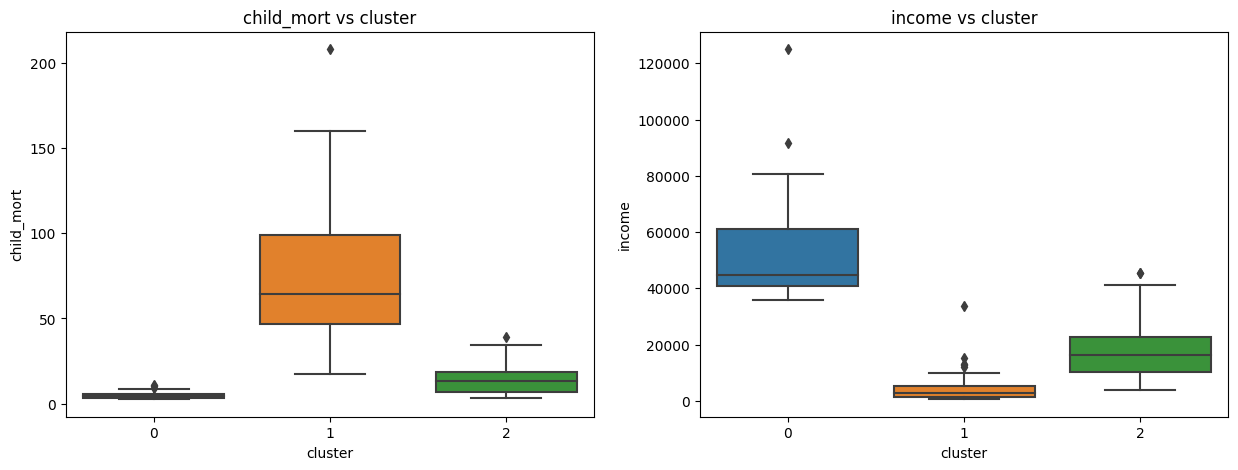

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x='cluster', y='child_mort', data=df_cluster2_p);
plt.title('child_mort vs cluster')

plt.subplot(1,2,2)
sns.boxplot(x='cluster', y='income', data=df_cluster2_p);
plt.title('income vs cluster')

plt.show()

In [ ]:
df_cluster2_p['cluster'].loc[df_cluster2_p['cluster'] == 0] = 'No Help Needed'
df_cluster2_p['cluster'].loc[df_cluster2_p['cluster'] == 1] = 'Need Help'
df_cluster2_p['cluster'].loc[df_cluster2_p['cluster'] == 2] = 'Might Need Help'

**visualising clusters using pair plots**

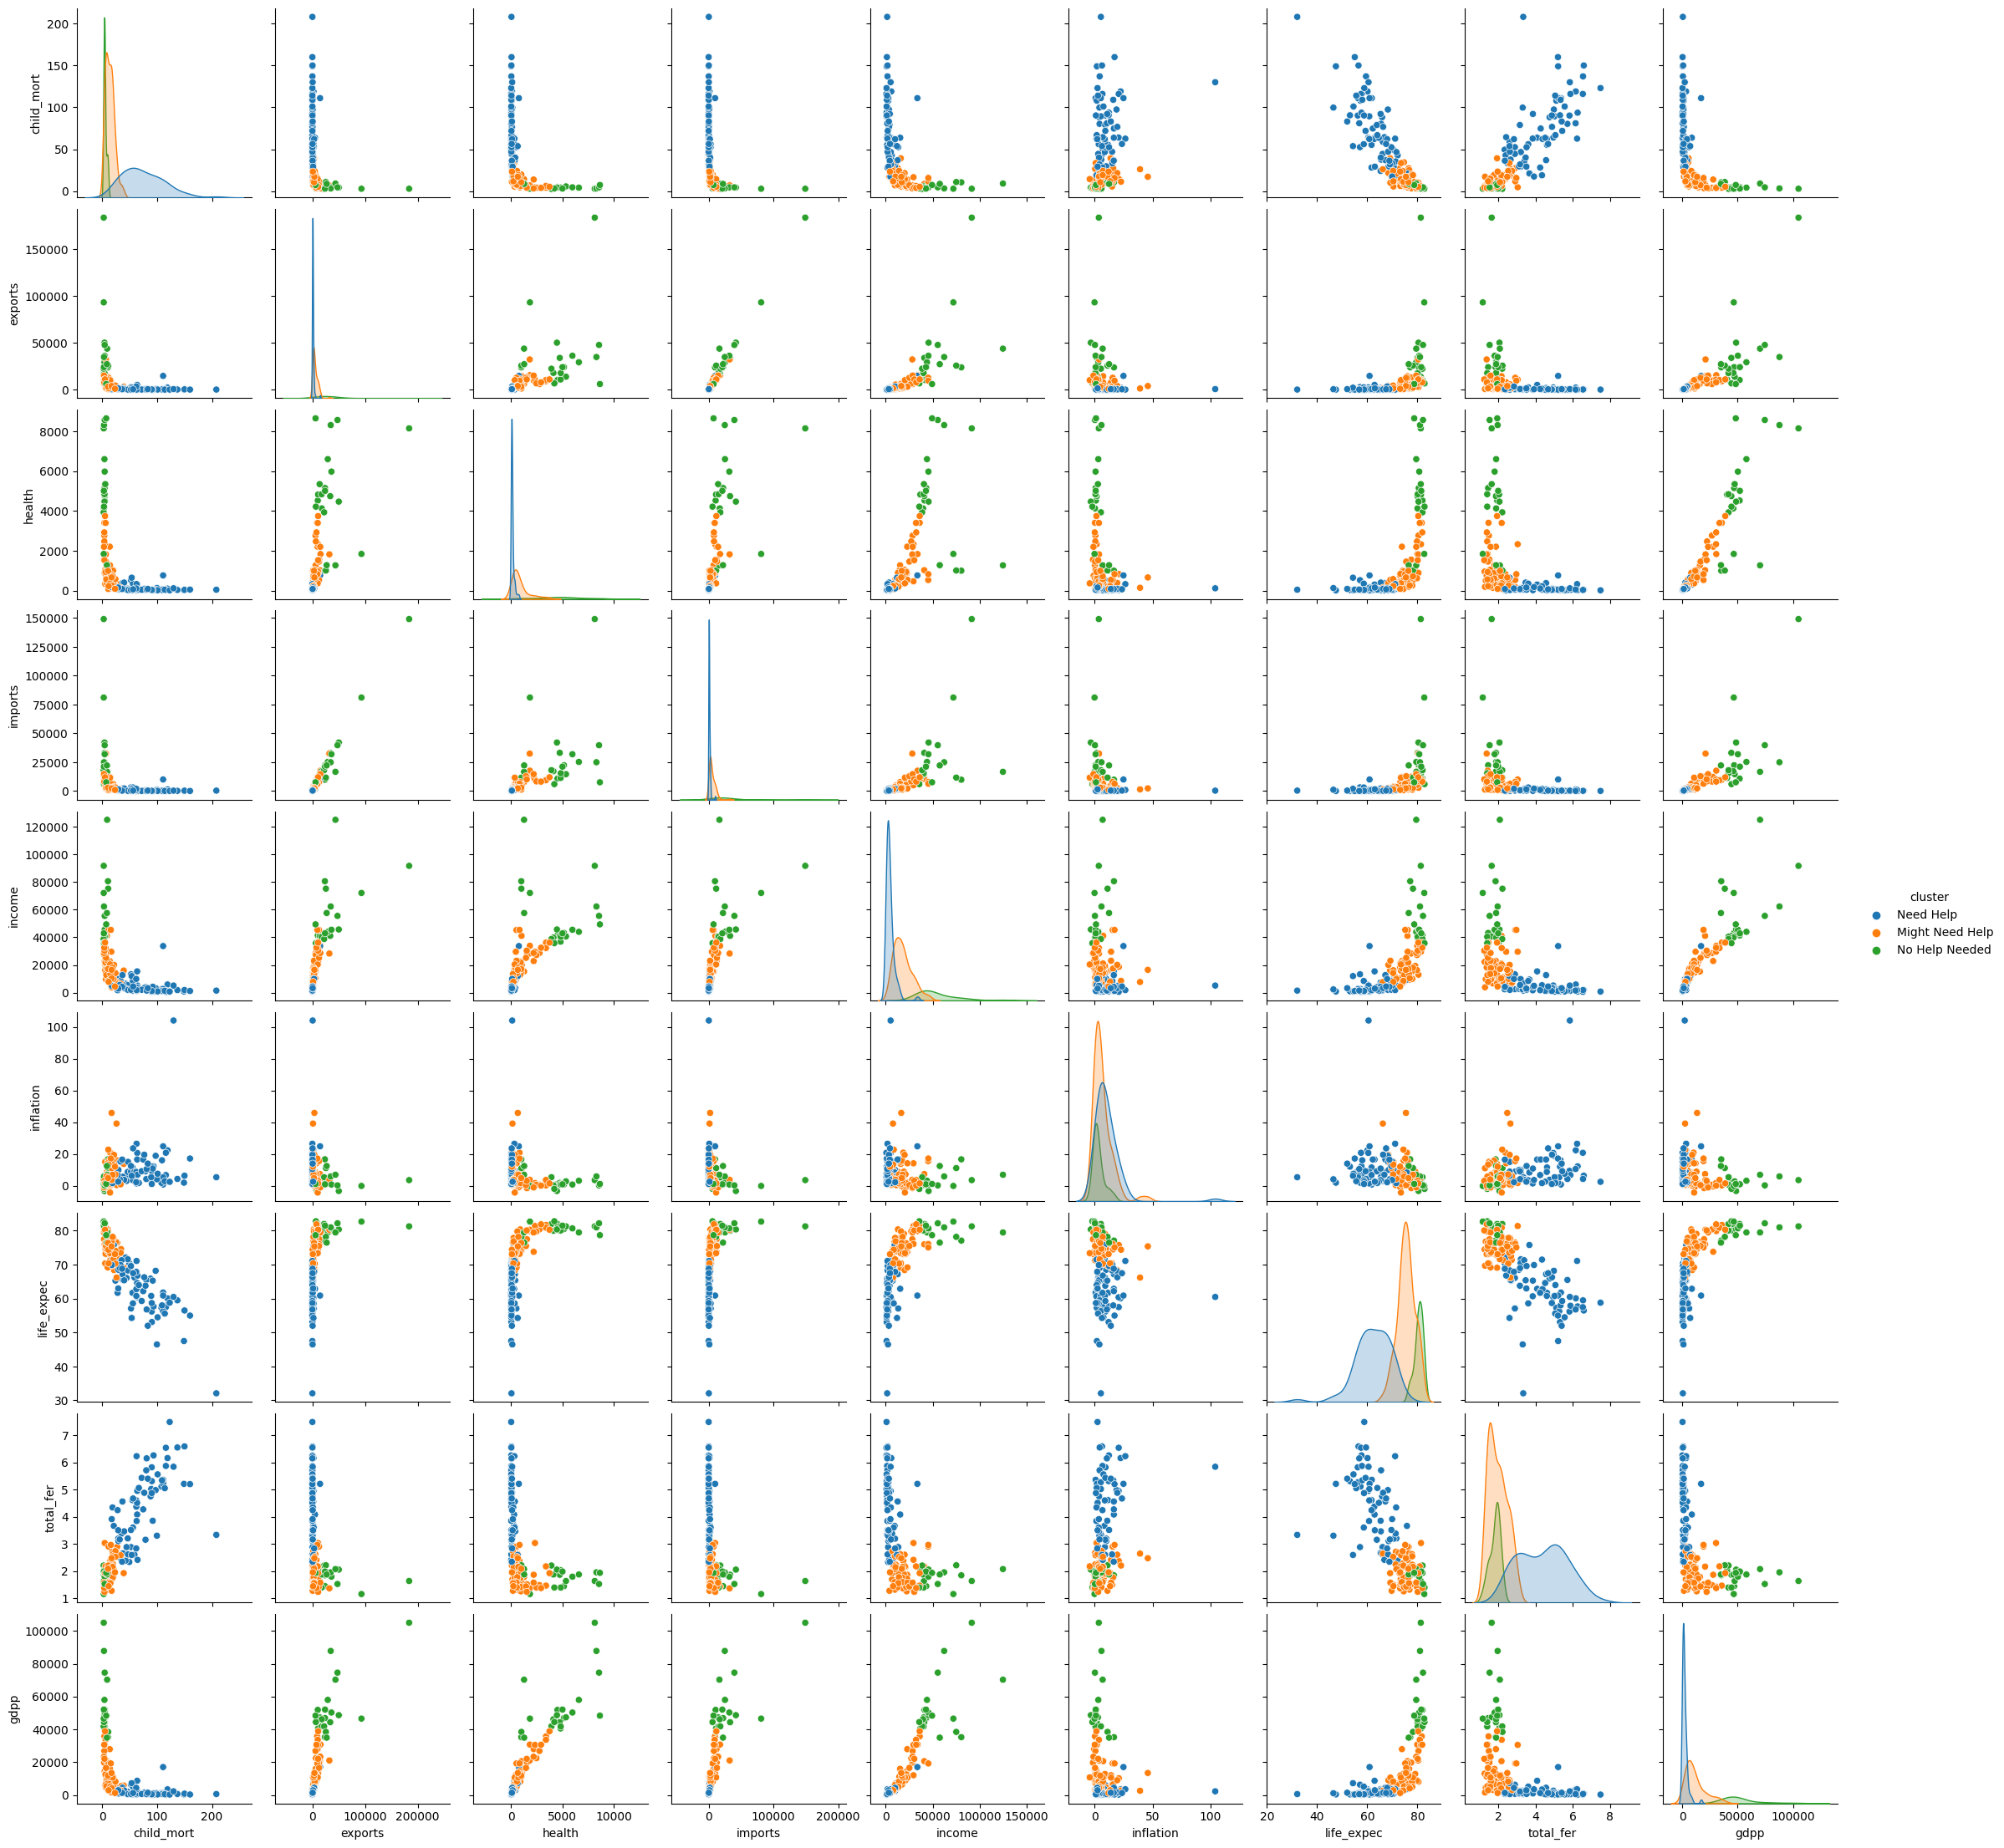

In [ ]:
sns.pairplot(df_cluster2_p, hue = "cluster")

**visualising clusters in the world map**

In [ ]:
import plotly.express as px
fig = px.choropleth(df_cluster2_p[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    color = df_cluster2_p['cluster'],
                    color_discrete_map = {'Need Help':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Blue'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.show(engine = 'kaleido')

**visualising by continent**

In [ ]:
fig = px.choropleth(df_cluster2_p[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title='Africa',
                    color = df_cluster2_p['cluster'],
                    color_discrete_map = {'Need Help':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Blue'},
                    projection='equirectangular',
                    scope='africa')
fig.update_geos(fitbounds = "locations", visible = True)
fig.show(engine = 'kaleido')

In [ ]:
fig = px.choropleth(df_cluster2_p[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title='Asia',
                    color = df_cluster2_p['cluster'],
                    color_discrete_map = {'Need Help':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Blue'},
                    projection='equirectangular',
                    scope='asia')
fig.update_geos(fitbounds = "locations", visible = True)
fig.show(engine = 'kaleido')

In [ ]:
fig = px.choropleth(df_cluster2_p[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title='Europe',
                    color = df_cluster2_p['cluster'],
                    color_discrete_map = {'Need Help':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Blue'},
                    projection='equirectangular',
                    scope='europe')
fig.update_geos(fitbounds = "locations", visible = True)
fig.show(engine = 'kaleido')

In [ ]:
fig = px.choropleth(df_cluster2_p[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title='North america',
                    color = df_cluster2_p['cluster'],
                    color_discrete_map = {'Need Help':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Blue'},
                    projection='equirectangular',
                    scope='north america')
fig.update_geos(fitbounds = "locations", visible = True)
fig.show(engine = 'kaleido')

In [ ]:
fig = px.choropleth(df_cluster2_p[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title='South america',
                    color = df_cluster2_p['cluster'],
                    color_discrete_map = {'Need Help':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Blue'},
                    projection='equirectangular',
                    scope='south america')
fig.update_geos(fitbounds = "locations", visible = True)
fig.show(engine = 'kaleido')

#**5. DBSCAN clustering**

**1. With PCA**

**determining the optimal values for epsilon and min_samples by performing hyperparameter tuning for DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN

eps_range = np.linspace(0.10, 1.00, num=100)
min_samples_range = range(2, 10)
s=-np.inf

for eps in eps_range:
  for min_samples in min_samples_range:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_df)
    n_clusters = len(np.unique(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    if (n_clusters==2):                #calculated silhouette score whenever the number of clusters is equal to 3 (n_clusters=2 + one cluster for noise)
      score = silhouette_score(pca_df, labels, metric = "euclidean")
      print(f'eps={eps:.2f}, min_samples={min_samples}, n_clusters={n_clusters}, n_noise={n_noise}, silhouette_score={score}')
      if (score>s):
        final_eps = eps   
        final_sample = min_samples    #updated the values of eps and min_samples if the score has improved
        s=score

eps=0.15, min_samples=3, n_clusters=2, n_noise=161, silhouette_score=-0.3651159970033751
eps=0.22, min_samples=4, n_clusters=2, n_noise=157, silhouette_score=-0.33927697762998055
eps=0.23, min_samples=5, n_clusters=2, n_noise=156, silhouette_score=-0.32784816749754864
eps=0.24, min_samples=5, n_clusters=2, n_noise=156, silhouette_score=-0.32784816749754864
eps=0.25, min_samples=5, n_clusters=2, n_noise=156, silhouette_score=-0.32784816749754864
eps=0.25, min_samples=5, n_clusters=2, n_noise=156, silhouette_score=-0.32784816749754864
eps=0.26, min_samples=6, n_clusters=2, n_noise=155, silhouette_score=-0.3567409430369403
eps=0.29, min_samples=6, n_clusters=2, n_noise=149, silhouette_score=-0.30932736539229355
eps=0.30, min_samples=6, n_clusters=2, n_noise=145, silhouette_score=-0.2811258112079343
eps=0.31, min_samples=6, n_clusters=2, n_noise=138, silhouette_score=-0.24012632402199385
eps=0.31, min_samples=7, n_clusters=2, n_noise=145, silhouette_score=-0.2770477695170704
eps=0.32, min_

In [ ]:
final_eps, final_sample

(0.8818181818181817, 9)

**eps=0.4 with min_samples=5**

In [ ]:
from sklearn.cluster import DBSCAN
np.random.seed(0)
db = DBSCAN(eps=0.8818181818181817, min_samples=9).fit(pca_df)

In [ ]:
cluster3 = db.fit_predict(pca_df)
print("Cluster assignments:\n", cluster3)

Cluster assignments:
 [ 0  0  0  0  0  0  0  1  1  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1
  0  0  0  0  0  1  0 -1  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0
  0 -1  0  0  0  1  1  0  0  0  1  0  0  0  0  0  0  0 -1  0  1  0  0  0
  0 -1  0  1  0  1  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0  0  0
  0  0 -1  0  0  0  0 -1  0  0  0  0  0  0 -1  1  0 -1 -1  0  0  0  0  0
  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  1  0  0  0  0
  1 -1  0  0  0  0  0  0  0  0  0  0  0 -1  1 -1  0  0  0 -1  0  0  0]


In [ ]:
unique_cluster, counts = np.unique(cluster3, return_counts=True)
percentages = counts / len(cluster3) * 100

print("Number of samples:")
for i, label in enumerate(unique_cluster):    #calculated number of samples for each cluster
  print(f"Cluster {label}: {counts[i]}")
print("")

print("Percentage:")
for i, label in enumerate(unique_cluster):
  print(f"Cluster {label}: {percentages[i]:.2f}%")

Number of samples:
Cluster -1: 20
Cluster 0: 134
Cluster 1: 13

Percentage:
Cluster -1: 11.98%
Cluster 0: 80.24%
Cluster 1: 7.78%


In [ ]:
print(f"Silhouette_score: {silhouette_score(pca_df, cluster3, metric = 'euclidean')}")

Silhouette_score: 0.3532992597999697


In [ ]:
df_cluster3 = data
df_cluster3['cluster']=cluster3   #assigned the cluster to original dataset
df_cluster3

country  child_mort  exports    health   imports  income  \
0            Afghanistan        90.2    55.30   41.9174   248.297    1610   
1                Albania        16.6  1145.20  267.8950  1987.740    9930   
2                Algeria        27.3  1712.64  185.9820  1400.440   12900   
3                 Angola       119.0  2199.19  100.6050  1514.370    5900   
4    Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   
..                   ...         ...      ...       ...       ...     ...   
162              Vanuatu        29.2  1384.02  155.9250  1565.190    2950   
163            Venezuela        17.1  3847.50  662.8500  2376.000   16500   
164              Vietnam        23.3   943.20   89.6040  1050.620    4490   
165                Yemen        56.3   393.00   67.8580   450.640    4480   
166               Zambia        83.1   540.20   85.9940   451.140    3280   

     inflation  life_expec  total_fer   gdpp  cluster  
0         9.44        56.2       5.82    553        0  
1         4.49        76.3       1.65   4090        0  
2        16.10        76.5       2.89   4460        0  
3        22.40        60.1       6.16   3530        0  
4         1.44        76.8       2.13  12200        0  
..         ...         ...        ...    ...      ...  
162       2.62        63.0       3.50   2970        0  
163      45.90        75.4       2.47  13500       -1  
164      12.10        73.1       1.95   1310        0  
165      23.60        67.5       4.67   1310        0  
166      14.00        52.0       5.40   1460        0  

[167 rows x 11 columns]

**determining which cluster needs help**

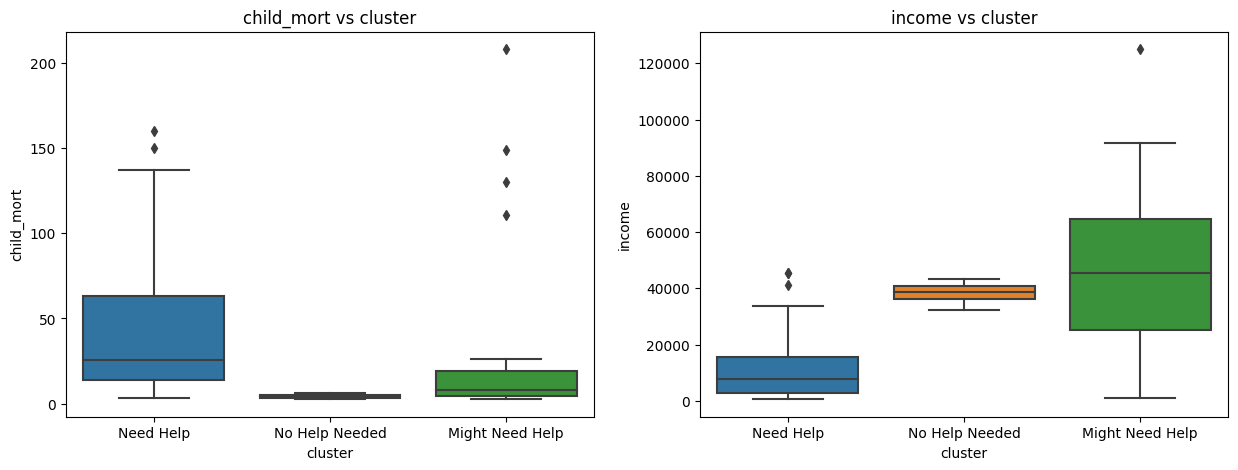

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x='cluster', y='child_mort', data=df_cluster3);
plt.title('child_mort vs cluster')

plt.subplot(1,2,2)
sns.boxplot(x='cluster', y='income', data=df_cluster3);
plt.title('income vs cluster')

plt.show()

In [ ]:
df_cluster3['cluster'].loc[df_cluster3['cluster'] == -1] = 'Might Need Help'
df_cluster3['cluster'].loc[df_cluster3['cluster'] == 0] = 'Need Help'
df_cluster3['cluster'].loc[df_cluster3['cluster'] == 1] = 'No Help Needed'

**visualising clusters using pair plots**

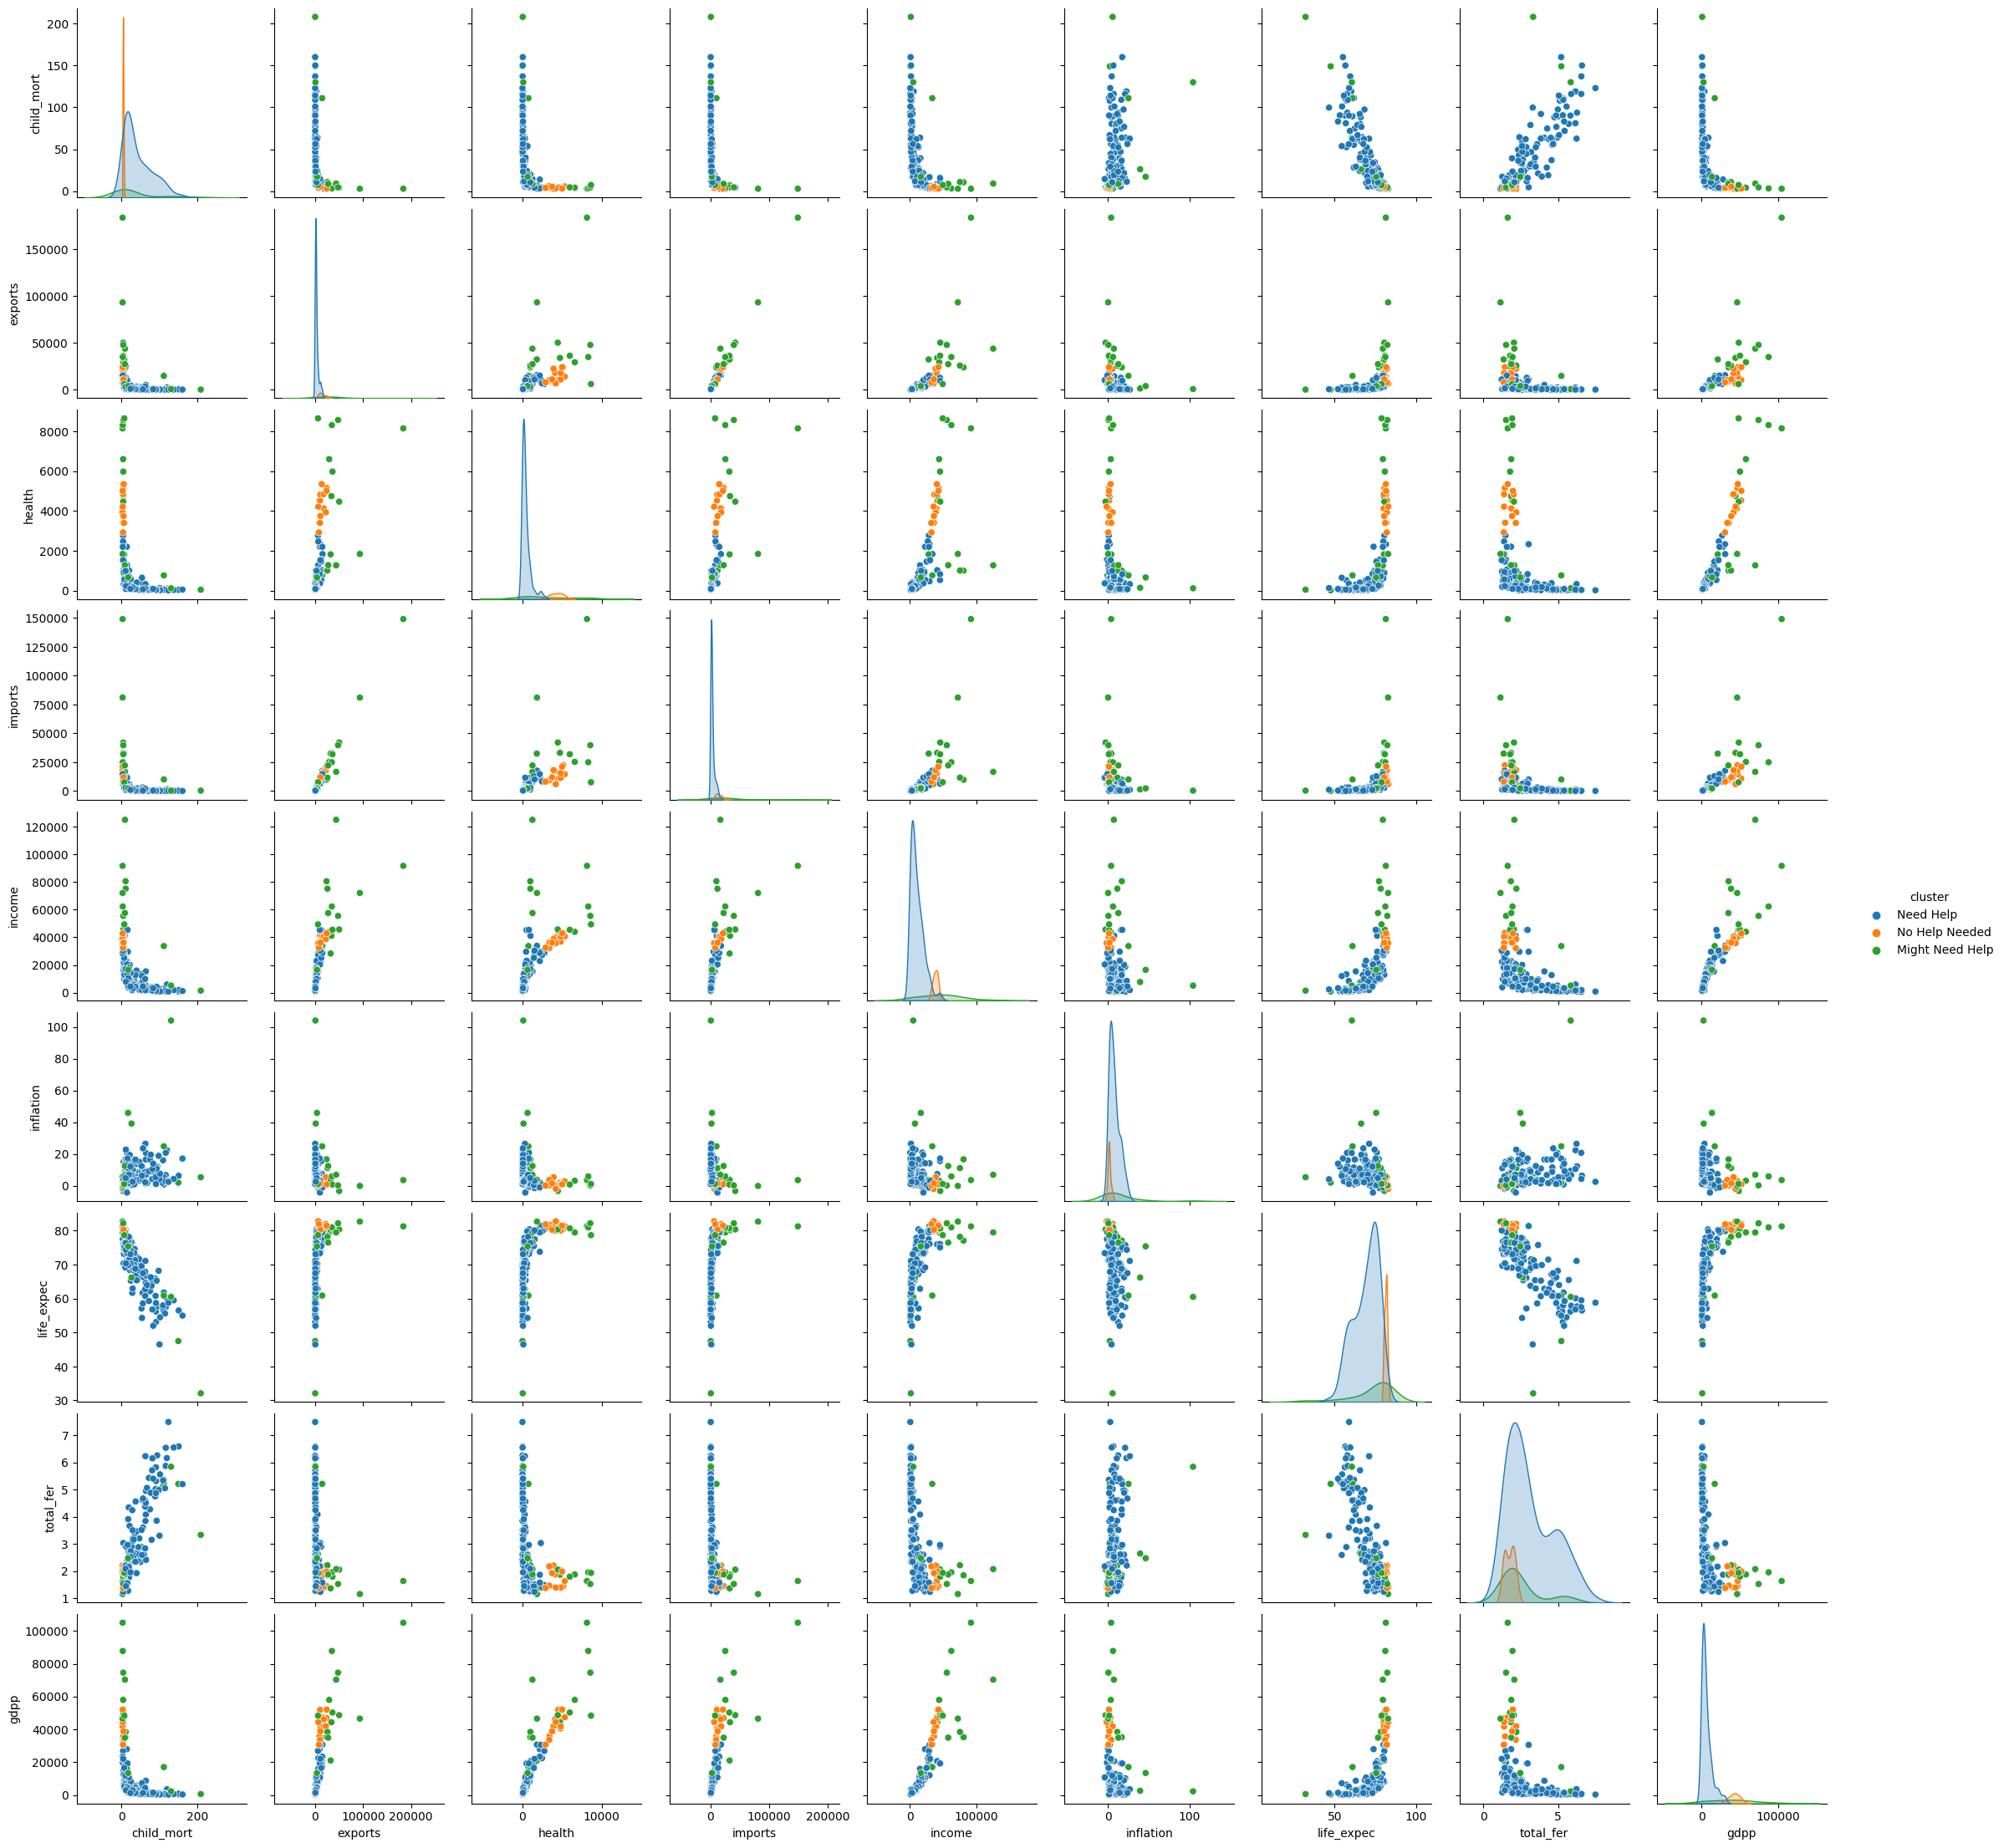

In [ ]:
sns.pairplot(df_cluster3, hue = "cluster")

**visualising clusters in the world map**

In [ ]:
import plotly.express as px
fig = px.choropleth(df_cluster3[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    color = df_cluster3['cluster'],
                    color_discrete_map = {'Need Help':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Blue'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.show(engine = 'kaleido')

**visualising by continent**

In [ ]:
fig = px.choropleth(df_cluster3[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title='Africa',
                    color = df_cluster3['cluster'],
                    color_discrete_map = {'Need Help':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Blue'},
                    projection='equirectangular',
                    scope='africa')
fig.update_geos(fitbounds = "locations", visible = True)
fig.show(engine = 'kaleido')

In [ ]:
fig = px.choropleth(df_cluster3[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title='Asia',
                    color = df_cluster3['cluster'],
                    color_discrete_map = {'Need Help':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Blue'},
                    projection='equirectangular',
                    scope='asia')
fig.update_geos(fitbounds = "locations", visible = True)
fig.show(engine = 'kaleido')

In [ ]:
fig = px.choropleth(df_cluster3[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title='Europe',
                    color = df_cluster3['cluster'],
                    color_discrete_map = {'Need Help':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Blue'},
                    projection='equirectangular',
                    scope='europe')
fig.update_geos(fitbounds = "locations", visible = True)
fig.show(engine = 'kaleido')

In [ ]:
fig = px.choropleth(df_cluster3[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title='North america',
                    color = df_cluster3['cluster'],
                    color_discrete_map = {'Need Help':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Blue'},
                    projection='equirectangular',
                    scope='north america')
fig.update_geos(fitbounds = "locations", visible = True)
fig.show(engine = 'kaleido')

In [ ]:
fig = px.choropleth(df_cluster3[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title='South america',
                    color = df_cluster3['cluster'],
                    color_discrete_map = {'Need Help':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Blue'},
                    projection='equirectangular',
                    scope='south america')
fig.update_geos(fitbounds = "locations", visible = True)
fig.show(engine = 'kaleido')

**2. Without PCA**

**determining the optimal values for epsilon and min_samples by performing hyperparameter tuning for DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN

eps_range = np.linspace(0.80, 1.50, num=100)
min_samples_range = range(2, 10)
s=-np.inf

for eps in eps_range:
  for min_samples in min_samples_range:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(newdf)
    n_clusters = len(np.unique(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    if (n_clusters==2):                #calculated silhouette score whenever the number of clusters is equal to 3 (n_clusters=2 + one cluster for noise)
      score = silhouette_score(newdf, labels, metric = "euclidean")
      print(f'eps={eps:.2f}, min_samples={min_samples}, n_clusters={n_clusters}, n_noise={n_noise}, silhouette_score={score}')
      if (score>s):
        final_eps = eps   
        final_sample = min_samples    #updated the values of eps and min_samples if the score has improved
        s=score

eps=0.80, min_samples=3, n_clusters=2, n_noise=38, silhouette_score=0.2500954595301558
eps=0.80, min_samples=4, n_clusters=2, n_noise=40, silhouette_score=0.24927783129993464
eps=0.80, min_samples=8, n_clusters=2, n_noise=75, silhouette_score=0.17369392979328147
eps=0.80, min_samples=9, n_clusters=2, n_noise=77, silhouette_score=0.15592765486415372
eps=0.81, min_samples=3, n_clusters=2, n_noise=37, silhouette_score=0.2589302188326878
eps=0.81, min_samples=4, n_clusters=2, n_noise=39, silhouette_score=0.2580714856696465
eps=0.81, min_samples=8, n_clusters=2, n_noise=74, silhouette_score=0.18029954032468606
eps=0.81, min_samples=9, n_clusters=2, n_noise=74, silhouette_score=0.18029954032468606
eps=0.81, min_samples=3, n_clusters=2, n_noise=36, silhouette_score=0.2656176982481162
eps=0.81, min_samples=4, n_clusters=2, n_noise=38, silhouette_score=0.2647530880525011
eps=0.81, min_samples=9, n_clusters=2, n_noise=72, silhouette_score=0.18832417454852096
eps=0.82, min_samples=3, n_clusters=2

In [ ]:
final_eps, final_sample

(0.9484848484848485, 3)

**eps=0.4 with min_samples=5**

In [ ]:
from sklearn.cluster import DBSCAN
np.random.seed(0)
db = DBSCAN(eps=0.9484848484848485, min_samples=3).fit(newdf)

In [ ]:
cluster3_p = db.fit_predict(newdf)
print("Cluster assignments:\n", cluster3_p)

Cluster assignments:
 [ 0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  1  0  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0
  0 -1  0  0  0  0  0  0  0  0 -1  0  0  0  0 -1  0  0  0 -1  0  0  0  0
  0  0 -1  0  0  0  0 -1  0  0  0  0  0  0  1  0  0 -1 -1 -1  0  0  0  0
  0  0  0 -1  0  0  0  0 -1  0  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0 -1  0  0  0  0  0  0  0 -1  0 -1  0  0  0 -1  0  0  0]


In [ ]:
unique_cluster, counts = np.unique(cluster3_p, return_counts=True)
percentages = counts / len(cluster3_p) * 100

print("Number of samples:")
for i, label in enumerate(unique_cluster):    #calculated number of samples for each cluster
  print(f"Cluster {label}: {counts[i]}")
print("")

print("Percentage:")
for i, label in enumerate(unique_cluster):
  print(f"Cluster {label}: {percentages[i]:.2f}%")

Number of samples:
Cluster -1: 23
Cluster 0: 141
Cluster 1: 3

Percentage:
Cluster -1: 13.77%
Cluster 0: 84.43%
Cluster 1: 1.80%


In [ ]:
print(f"Silhouette_score: {silhouette_score(newdf, cluster3_p, metric = 'euclidean')}")

Silhouette_score: 0.3213022860110205


In [ ]:
df_cluster3_p = data
df_cluster3_p['cluster']=cluster3_p   #assigned the cluster to original dataset
df_cluster3_p

country  child_mort  exports    health   imports  income  \
0            Afghanistan        90.2    55.30   41.9174   248.297    1610   
1                Albania        16.6  1145.20  267.8950  1987.740    9930   
2                Algeria        27.3  1712.64  185.9820  1400.440   12900   
3                 Angola       119.0  2199.19  100.6050  1514.370    5900   
4    Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   
..                   ...         ...      ...       ...       ...     ...   
162              Vanuatu        29.2  1384.02  155.9250  1565.190    2950   
163            Venezuela        17.1  3847.50  662.8500  2376.000   16500   
164              Vietnam        23.3   943.20   89.6040  1050.620    4490   
165                Yemen        56.3   393.00   67.8580   450.640    4480   
166               Zambia        83.1   540.20   85.9940   451.140    3280   

     inflation  life_expec  total_fer   gdpp  cluster  
0         9.44        56.2       5.82    553        0  
1         4.49        76.3       1.65   4090        0  
2        16.10        76.5       2.89   4460        0  
3        22.40        60.1       6.16   3530        0  
4         1.44        76.8       2.13  12200        0  
..         ...         ...        ...    ...      ...  
162       2.62        63.0       3.50   2970        0  
163      45.90        75.4       2.47  13500       -1  
164      12.10        73.1       1.95   1310        0  
165      23.60        67.5       4.67   1310        0  
166      14.00        52.0       5.40   1460        0  

[167 rows x 11 columns]

**determining which cluster needs help**

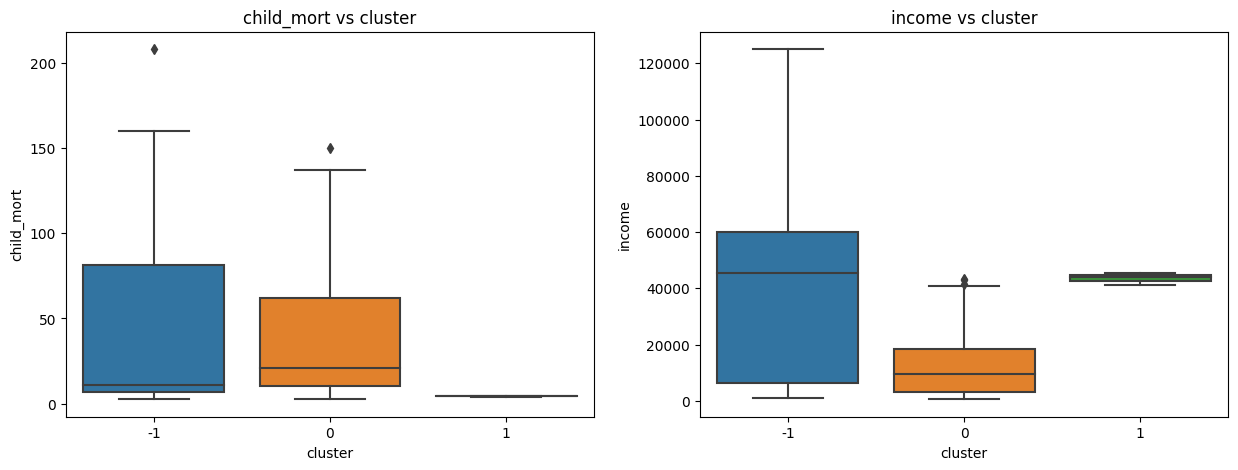

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x='cluster', y='child_mort', data=df_cluster3_p);
plt.title('child_mort vs cluster')

plt.subplot(1,2,2)
sns.boxplot(x='cluster', y='income', data=df_cluster3_p);
plt.title('income vs cluster')

plt.show()

In [ ]:
df_cluster3_p['cluster'].loc[df_cluster3_p['cluster'] == -1] = 'Might Need Help'
df_cluster3_p['cluster'].loc[df_cluster3_p['cluster'] == 0] = 'Need Help'
df_cluster3_p['cluster'].loc[df_cluster3_p['cluster'] == 1] = 'No Help Needed'

**visualising clusters using pair plots**

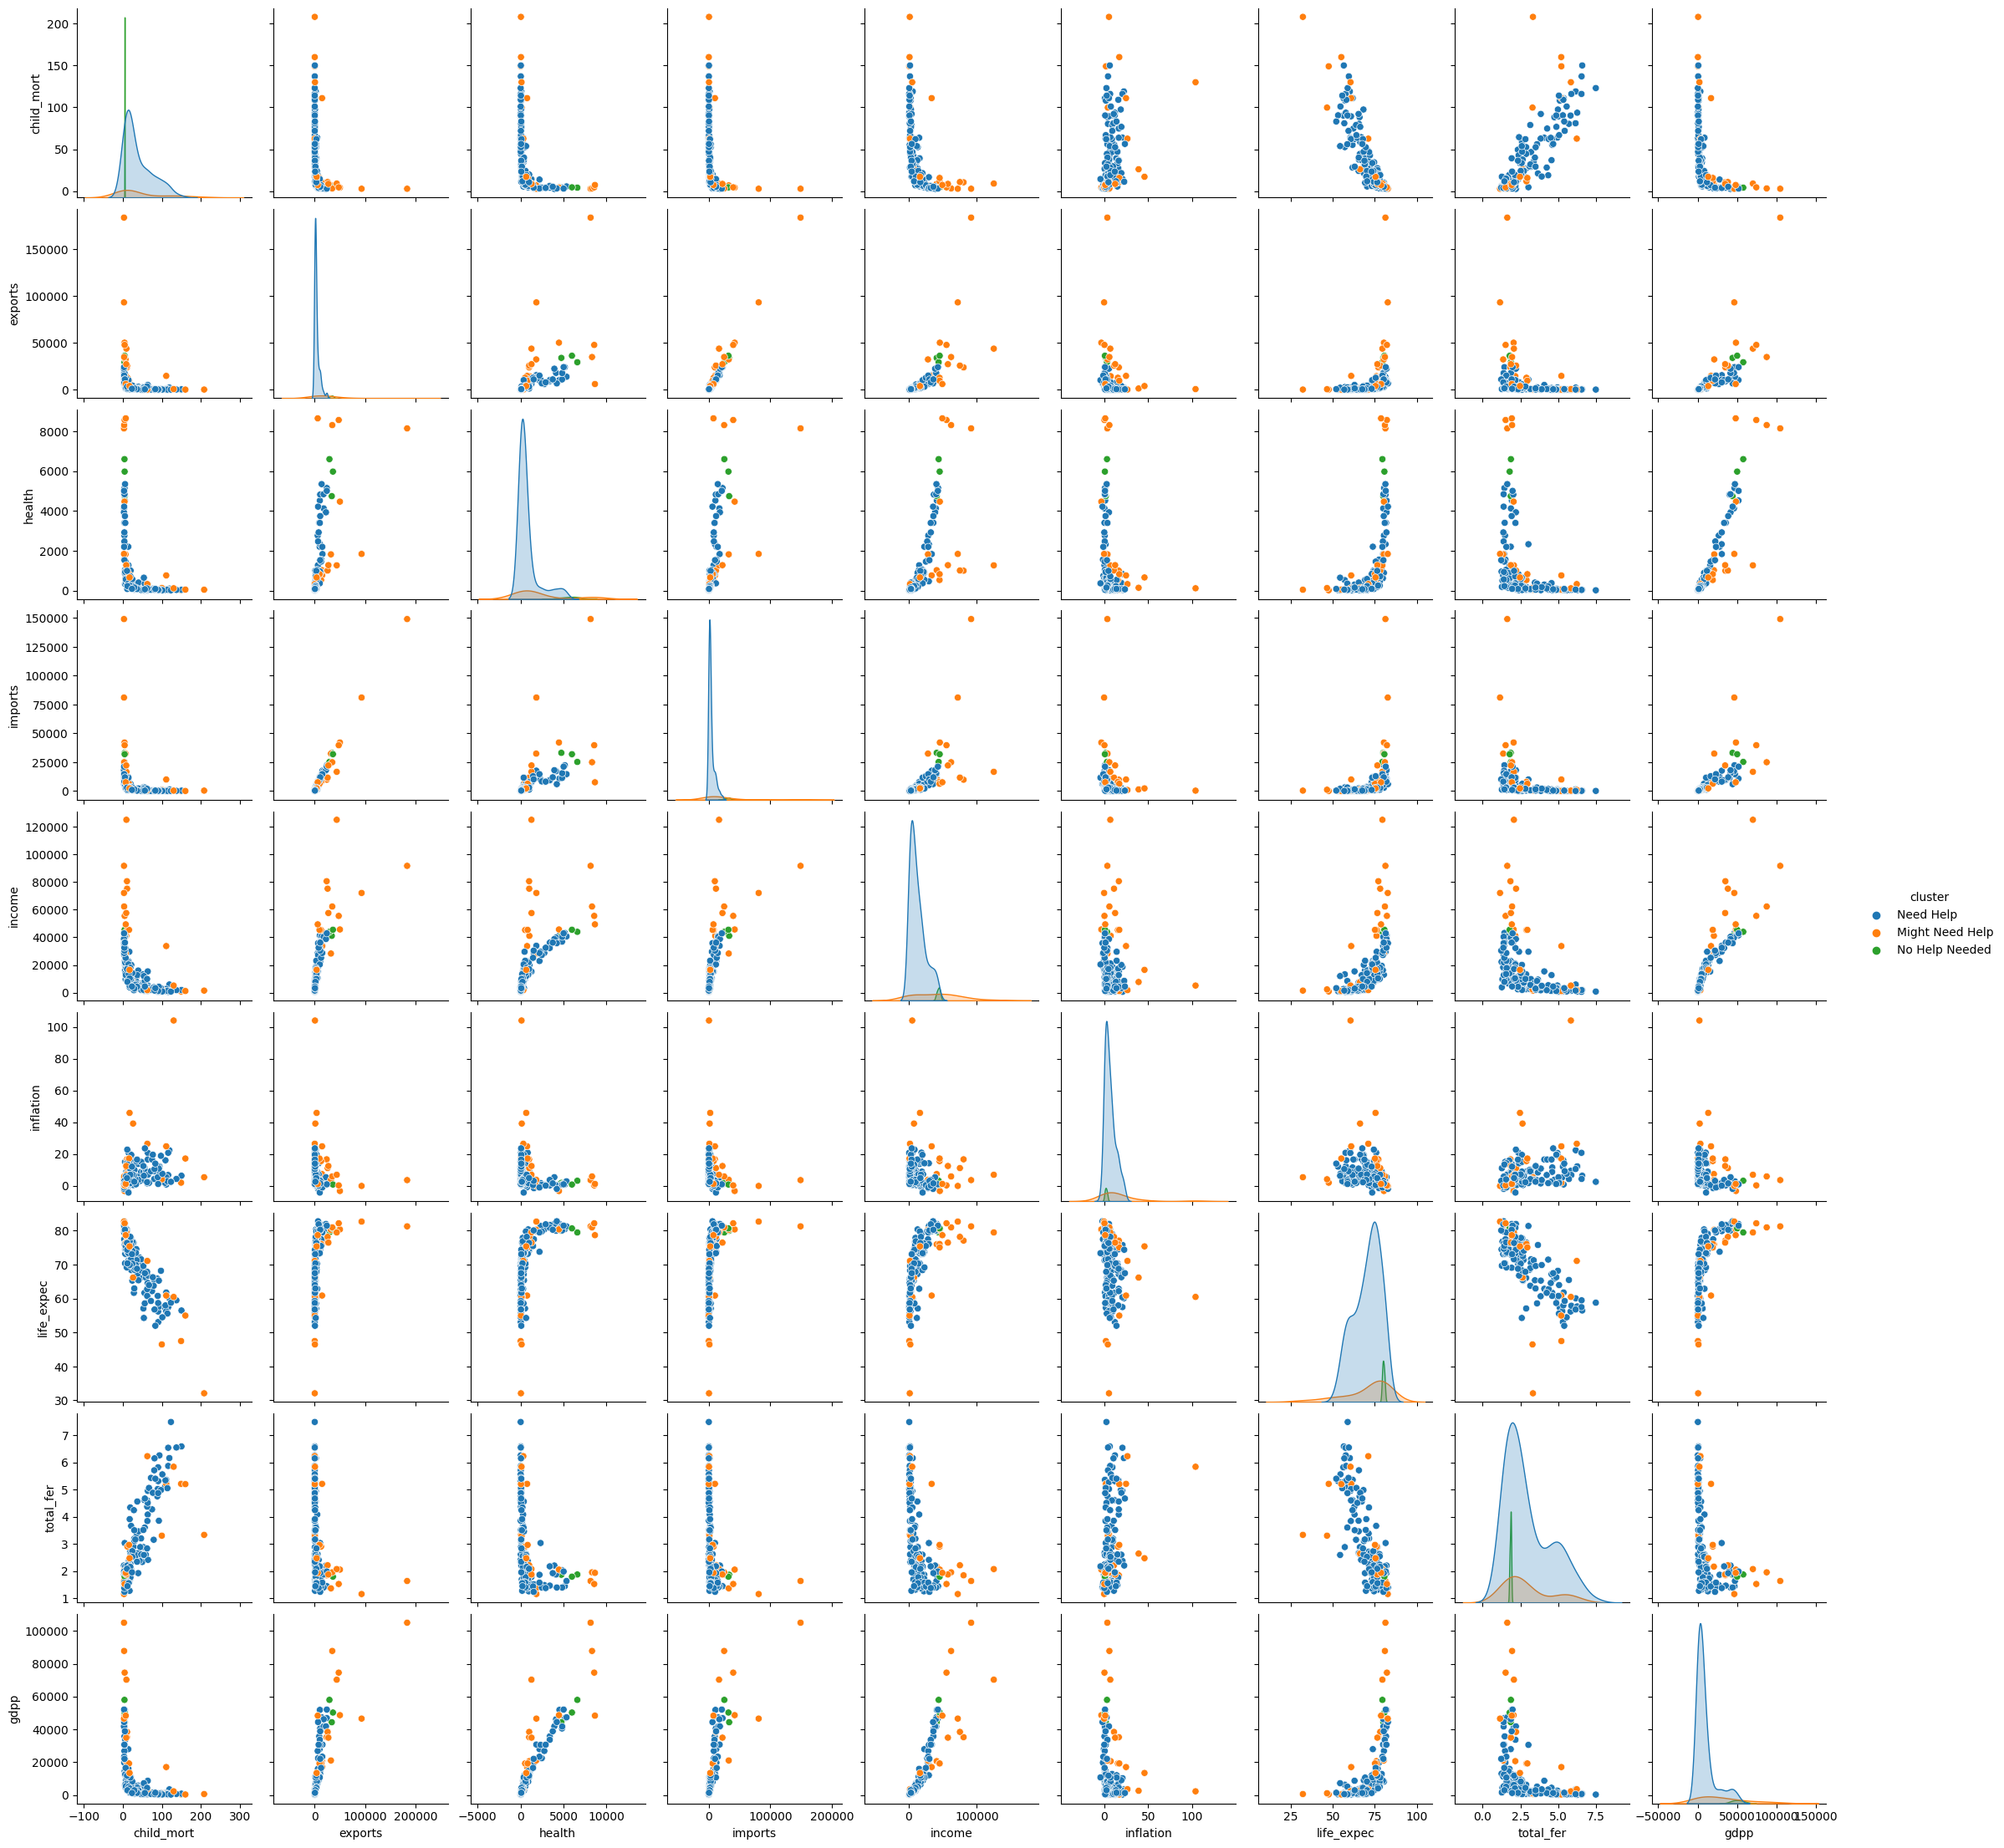

In [ ]:
sns.pairplot(df_cluster3_p, hue = "cluster")

**visualising clusters in the world map**

In [ ]:
import plotly.express as px
fig = px.choropleth(df_cluster3_p[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    color = df_cluster3_p['cluster'],
                    color_discrete_map = {'Need Help':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Blue'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.show(engine = 'kaleido')

**visualising by continent**

In [ ]:
fig = px.choropleth(df_cluster3_p[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title='Africa',
                    color = df_cluster3_p['cluster'],
                    color_discrete_map = {'Need Help':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Blue'},
                    projection='equirectangular',
                    scope='africa')
fig.update_geos(fitbounds = "locations", visible = True)
fig.show(engine = 'kaleido')

In [ ]:
fig = px.choropleth(df_cluster3_p[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title='Asia',
                    color = df_cluster3_p['cluster'],
                    color_discrete_map = {'Need Help':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Blue'},
                    projection='equirectangular',
                    scope='asia')
fig.update_geos(fitbounds = "locations", visible = True)
fig.show(engine = 'kaleido')

In [ ]:
fig = px.choropleth(df_cluster3_p[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title='Europe',
                    color = df_cluster3_p['cluster'],
                    color_discrete_map = {'Need Help':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Blue'},
                    projection='equirectangular',
                    scope='europe')
fig.update_geos(fitbounds = "locations", visible = True)
fig.show(engine = 'kaleido')

In [ ]:
fig = px.choropleth(df_cluster3_p[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title='North america',
                    color = df_cluster3_p['cluster'],
                    color_discrete_map = {'Need Help':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Blue'},
                    projection='equirectangular',
                    scope='north america')
fig.update_geos(fitbounds = "locations", visible = True)
fig.show(engine = 'kaleido')

In [ ]:
fig = px.choropleth(df_cluster3_p[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title='South america',
                    color = df_cluster3_p['cluster'],
                    color_discrete_map = {'Need Help':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Blue'},
                    projection='equirectangular',
                    scope='south america')
fig.update_geos(fitbounds = "locations", visible = True)
fig.show(engine = 'kaleido')